<a target="_blank" href="https://colab.research.google.com/github/eeg2025/startkit/blob/main/challenge_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Challenge 1: Cross-Task Transfer Learning!

## How can we use the knowledge from one EEG Decoding task into another?

Transfer learning is a widespread technique used in deep learning. It uses knowledge learned from one source task/domain in another target task/domain. It has been studied in depth in computer vision, natural language processing, and speech, but what about EEG brain decoding?

The cross-task transfer learning scenario in EEG decoding is remarkably underexplored in comparison to the developers of new models, [Aristimunha et al., (2023)](https://arxiv.org/abs/2308.02408), even though it can be much more useful for real applications, see [Wimpff et al. (2025)](https://arxiv.org/abs/2502.06828), [Wu et al. (2025)](https://arxiv.org/abs/2507.09882).

Our Challenge 1 addresses a key goal in neurotechnology: decoding cognitive function from EEG using the pre-trained knowledge from another. In other words, developing models that can effectively transfer/adapt/adjust/fine-tune knowledge from passive EEG tasks to active tasks.

The ability to generalize and transfer is something critical that we believe should be focused. To go beyond just comparing metrics numbers that are often not comparable, given the specificities of EEG, such as pre-processing, inter-subject variability, and many other unique components of this type of data.

This means your submitted model might be trained on a subset of tasks and fine-tuned on data from another condition, evaluating its capacity to generalize with task-specific fine-tuning.

__________

Note: For simplicity purposes, we will only show how to do the decoding directly in our target task, and it is up to the teams to think about how to use the passive task to perform the pre-training.

In [1]:
# Save Model as .pt File
import os
from datetime import datetime

def save_model_as_pt(model, save_dir="models", filename=None):
    """
    Save EEGConformer model as .pt file (PyTorch format)
    """
    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    if filename is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"eegconformer_challenge1_{timestamp}.pt"
    
    model_path = os.path.join(save_dir, filename)
    
    # Save only the model state dict (standard .pt format)
    torch.save(model.state_dict(), model_path)
    
    print(f"✅ Model saved as .pt file: {model_path}")
    print(f"   Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"   File size: {os.path.getsize(model_path) / 1024 / 1024:.2f} MB")
    
    return model_path

def load_model_from_pt(model_path, device):
    """
    Load EEGConformer model from .pt file
    """
    # Model configuration (must match training configuration)
    model_config = {
        'n_chans': 129,
        'n_outputs': 1,
        'n_times': 200,
        'sfreq': 100,
        'n_filters_time': 40,
        'filter_time_length': 25,
        'pool_time_length': 75,
        'pool_time_stride': 15,
        'att_depth': 6,
        'att_heads': 10,
        'drop_prob': 0.5,
        'att_drop_prob': 0.5,
        'final_fc_length': 'auto',
        'return_features': False,
        'activation': torch.nn.ELU,
        'activation_transfor': torch.nn.GELU,
    }
    
    # Create model with same configuration
    model = EEGConformer(**model_config)
    
    # Load state dict
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()  # Set to evaluation mode
    
    print(f"✅ Model loaded from .pt file: {model_path}")
    print(f"   Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    return model

# Example usage:
# Save model after training:
# model_path = save_model_as_pt(model_conformer, filename="my_eegconformer.pt")

# Load model for inference:
# loaded_model = load_model_from_pt(model_path, device)

print("💾 Model Saving/Loading Ready!")
print("Use save_model_as_pt() to save as .pt file")
print("Use load_model_from_pt() to load from .pt file")


💾 Model Saving/Loading Ready!
Use save_model_as_pt() to save as .pt file
Use load_model_from_pt() to load from .pt file


In [2]:
# Example: Save and Load Model
# This cell shows how to save your trained model as a .pt file

# After training your model, save it:
# model_path = save_model_as_pt(
#     model=model_conformer,
#     save_dir="models",
#     filename="eegconformer_final.pt"
# )

# To load the model later for inference:
# loaded_model = load_model_from_pt("models/eegconformer_final.pt", device)

# For submission purposes, you might want to save with a specific name:
# submission_path = save_model_as_pt(
#     model=model_conformer,
#     save_dir="submission_1",
#     filename="model_weights_challenge_1.pt"
# )

print("📝 Example Usage:")
print("1. Train your model")
print("2. Save with: save_model_as_pt(model_conformer, filename='my_model.pt')")
print("3. Load with: loaded_model = load_model_from_pt('my_model.pt', device)")
print("4. Use loaded_model for inference")

# Check if you have any existing .pt files
import glob
existing_models = glob.glob("*.pt") + glob.glob("models/*.pt") + glob.glob("submission_1/*.pt")
if existing_models:
    print(f"\n📁 Found existing .pt files:")
    for model_file in existing_models:
        size_mb = os.path.getsize(model_file) / 1024 / 1024
        print(f"   - {model_file} ({size_mb:.2f} MB)")
else:
    print("\n📁 No existing .pt files found")


📝 Example Usage:
1. Train your model
2. Save with: save_model_as_pt(model_conformer, filename='my_model.pt')
3. Load with: loaded_model = load_model_from_pt('my_model.pt', device)
4. Use loaded_model for inference

📁 No existing .pt files found


---
## Summary table for this start kit

In this tutorial, we are going to show in more detail what we want from Challenge 1:

**Contents**:

0. Understand the Contrast Change Detection - CCD task.
1. Understand the [`EEGChallengeDataset`](https://eeglab.org/EEGDash/api/eegdash.html#eegdash.EEGChallengeDataset) object.
2. Preparing the dataloaders.
3. Building the deep learning model with [`braindecode`](https://braindecode.org/stable/models/models_table.html).
4. Designing the training loop.
5. Training the model.
6. Evaluating test performance.
7. Going further, *benchmark go brrr!*



More contents will be released during the competition inside the [`eegdash`](https://eeglab.org/EEGDash/overview.html) [examples webpage](https://eeglab.org/EEGDash/generated/auto_examples/index.html).

We will establish direct communication channels with you over the next two months, resolve platform issues, and discuss other details.

We are going to do weekly one-hour support time to help teams that may have difficulties with any technical aspects that may arise.

We will have closer communication starting next week, 08/09/2025.

Before we begin, I just want to make a deal with you, ok?

This is a community competition with a strong open-source foundation. When I say open-source, I mean volunteer work.

So, if you see something that does not work or could be improved, first, **please be kind**, and we will fix it together on GitHub, okay?

The entire decoding community will only go further when we stop solving the same problems over and over again, and it starts working together.

----

| The tutorial assumes some prior knowledge of deep learning concepts and EEG concepts:|
| --- |
|* Standard neural network architectures, e.g., convolutional neural networks|
|* Optimization by batch gradient descent and backpropagation|
|* Overfitting, early stopping, regularisation |
|* Some knowledge of pytorch and, optionally, of the pytorch Lightning framework|
|* That you know what EEG is |
|* That you have basic familiarity with EEG preprocessing |
|* Like and support open-source :) |

**NOTE: You will still be able to run the whole notebook at your own pace and learn about these concepts along the way**
**NOTE: If you just want run the code and start to play, please go to the challenge version 1, clean in the folder**

----

⚠️ **In case of colab, before starting, make sure you're on a GPU instance for faster training!** ⚠️

> If running on Google Colab, please request a GPU runtime by clicking `Runtime/Change runtime type` in the top bar menu, then selecting 'T4 GPU' under 'Hardware accelerator'.

In [3]:
# Identify whether a CUDA-enabled GPU is available
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cuda":
    msg ='CUDA-enabled GPU found. Training should be faster.'
else:
    msg = (
        "No GPU found. Training will be carried out on CPU, which might be "
        "slower.\n\nIf running on Google Colab, you can request a GPU runtime by"
        " clicking\n`Runtime/Change runtime type` in the top bar menu, then "
        "selecting \'T4 GPU\'\nunder \'Hardware accelerator\'."
    )
print(msg)

No GPU found. Training will be carried out on CPU, which might be slower.

If running on Google Colab, you can request a GPU runtime by clicking
`Runtime/Change runtime type` in the top bar menu, then selecting 'T4 GPU'
under 'Hardware accelerator'.


For the challenge, we will need two significant dependencies: `braindecode` and `eegdash`. The libraries will install PyTorch, Pytorch Audio, Scikit-learn, MNE, MNE-BIDS, and many other packages necessary for the many functions.

In [4]:
from pathlib import Path
from braindecode.datasets import BaseConcatDataset

data_dir = Path("data")
available_releases = []

if data_dir.exists():
    for item in data_dir.iterdir():
        if item.is_dir() and item.name.startswith("release_"):
            release_num = item.name.split("_")[1]
            available_releases.append(int(release_num))

available_releases.sort()
print(f"Available releases: {available_releases}")

# Use release 5 (like original) or choose a different one
RELEASE_ID = 5  # Change this to use a different release
RELEASE_DIR = Path(f"data/release_{RELEASE_ID}")

if not RELEASE_DIR.exists():
    print(f"Available releases: {available_releases}")
    # Use the first available release if R5 doesn't exist
    if available_releases:
        RELEASE_ID = available_releases[0]
        RELEASE_DIR = Path(f"data/release_{RELEASE_ID}")
        print(f"🔄 Using Release {RELEASE_ID} instead")
    else:
        raise FileNotFoundError("No release folders found in data/")

print(f"📁 Loading data from: {RELEASE_DIR.resolve()}")

from eegdash.dataset import EEGChallengeDataset

# =============================================================================
# MULTI-TASK LEARNING: Load all available tasks for training
# =============================================================================
# Define all available tasks (for multi-task learning)
# Note: We still predict on contrastChangeDetection in the end
available_tasks = [
    "contrastChangeDetection",  # Primary target (has response times)
    "seqlearning6target",       # Sequence learning 6-target
    "seqlearning8target",       # Sequence learning 8-target
    "symbolSearch",             # Symbol search task
    "surroundsupp",             # Surround suppression task
    "restingState",             # Resting state (passive)
    # "movieWatching",          # Movie watching (if available)
]

# Load datasets for all tasks from the release
all_task_datasets = []
target_task = "contrastChangeDetection"  # This is what we predict on

print(f"\n🔄 Loading all available tasks for multi-task learning...")
print(f"🎯 Target task for prediction: {target_task}")
print("=" * 70)

for task in available_tasks:
    try:
        dataset = EEGChallengeDataset(
            task=task,
            release=f"R{RELEASE_ID}",
            cache_dir=RELEASE_DIR,
            mini=False
        )
        if len(dataset.datasets) > 0:
            all_task_datasets.append(dataset)
            print(f"✅ {task:25s}: {len(dataset.datasets):4d} recordings")
        else:
            print(f"⚠️  {task:25s}: No recordings found (skipping)")
    except Exception as e:
        print(f"❌ {task:25s}: Failed to load - {str(e)[:50]}")

# Combine all task datasets into one
if all_task_datasets:
    combined_dataset = BaseConcatDataset(all_task_datasets)
    print(f"\n📊 Combined dataset: {len(combined_dataset.datasets)} total recordings")
    print(f"   Across {len(all_task_datasets)} different tasks")
    
    # Also keep the target task dataset separate for evaluation
    target_dataset = None
    for dataset in all_task_datasets:
        # Find the contrastChangeDetection dataset
        if len(dataset.datasets) > 0:
            # Check first dataset to see what task it is
            first_ds = dataset.datasets[0]
            if hasattr(first_ds, 'description') and 'task' in first_ds.description:
                if first_ds.description['task'].lower().replace(' ', '') == 'contrastchangedetection':
                    target_dataset = dataset
                    break
    
    if target_dataset is None:
        # Fallback: use first dataset if we can't identify
        target_dataset = all_task_datasets[0]
    
    dataset_ccd = target_dataset  # Keep for compatibility
    print(f"🎯 Target task dataset ({target_task}): {len(target_dataset.datasets)} recordings")
else:
    print("❌ No datasets loaded! Please check your data directory.")
    raise ValueError("No datasets could be loaded")

# Helper function to load different releases for transfer learning
def load_release_data(release_id, task="contrastChangeDetection", mini=False):
    """
    Load data from a specific release folder
    
    Args:
        release_id (int): Release number (1-11)
        task (str): Task name (use None or "all" to load all tasks)
        mini (bool): Whether to use mini dataset
    
    Returns:
        EEGChallengeDataset or BaseConcatDataset: Loaded dataset(s)
    """
    release_dir = Path(f"data/release_{release_id}")
    
    if not release_dir.exists():
        raise FileNotFoundError(f"Release {release_id} folder not found: {release_dir}")
    
    print(f"Loading Release R{release_id} from: {release_dir.resolve()}")
    
    if task == "all" or task is None:
        # Load all tasks
        task_datasets = []
        for task_name in available_tasks:
            try:
                ds = EEGChallengeDataset(
                    task=task_name,
                    release=f"R{release_id}",
                    cache_dir=release_dir,
                    mini=mini
                )
                if len(ds.datasets) > 0:
                    task_datasets.append(ds)
                    print(f"  ✅ {task_name}: {len(ds.datasets)} recordings")
            except Exception as e:
                print(f"  ⚠️  {task_name}: Failed to load")
        
        if task_datasets:
            return BaseConcatDataset(task_datasets)
        else:
            raise ValueError(f"No tasks could be loaded from Release R{release_id}")
    else:
        # Load single task
        dataset = EEGChallengeDataset(
            task=task,
            release=f"R{release_id}",
            cache_dir=release_dir,
            mini=mini
        )
        print(f"Loaded {len(dataset.datasets)} recordings from Release R{release_id}")
        return dataset

print("\n💡 Usage:")
print(f"  - combined_dataset: All tasks combined ({len(combined_dataset.datasets)} recordings)")
print(f"  - dataset_ccd: Target task only ({len(dataset_ccd.datasets)} recordings)")
print(f"  - Use combined_dataset for training (multi-task learning)")
print(f"  - Use dataset_ccd for evaluation on target task")


Available releases: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
📁 Loading data from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_5

🔄 Loading all available tasks for multi-task learning...
🎯 Target task for prediction: contrastChangeDetection


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


✅ contrastChangeDetection  :  745 recordings
❌ seqlearning6target       : Failed to load - datasets should not be an empty iterable
❌ seqlearning8target       : Failed to load - datasets should not be an empty iterable


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(
/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset

✅ symbolSearch             :  201 recordings
❌ surroundsupp             : Failed to load - datasets should not be an empty iterable
❌ restingState             : Failed to load - datasets should not be an empty iterable

📊 Combined dataset: 946 total recordings
   Across 2 different tasks
🎯 Target task dataset (contrastChangeDetection): 745 recordings

💡 Usage:
  - combined_dataset: All tasks combined (946 recordings)
  - dataset_ccd: Target task only (745 recordings)
  - Use combined_dataset for training (multi-task learning)
  - Use dataset_ccd for evaluation on target task


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(
/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset

In [5]:
# TRANSFER LEARNING SETUP: Load multiple releases for pre-training and target tasks
print("🔄 Setting up Transfer Learning with Multiple Releases")
print("="*60)

# Option 1: Load source data for pre-training (e.g., releases 1-3)
source_releases = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11]  # Releases to use for pre-training
source_datasets = []

print(f"📚 Loading source releases for pre-training: {source_releases}")
for release_id in source_releases:
    try:
        dataset = load_release_data(release_id, mini=False)
        source_datasets.append(dataset)
        print(f"✅ Added Release R{release_id}: {len(dataset.datasets)} recordings")
    except Exception as e:
        print(f"❌ Failed to load Release R{release_id}: {e}")

# Option 2: Load target data (e.g., release 5)
target_release = 5
print(f"\n🎯 Loading target release: R{target_release}")
try:
    target_dataset = load_release_data(target_release, mini=False)
    print(f"✅ Target dataset ready: {len(target_dataset.datasets)} recordings")
except Exception as e:
    print(f"❌ Failed to load target release: {e}")
    # Use the main dataset as fallback
    target_dataset = dataset_ccd
    print(f"🔄 Using main dataset as target: {len(target_dataset.datasets)} recordings")

# Summary
total_source_recordings = sum(len(dataset.datasets) for dataset in source_datasets)
print(f"\n📊 Transfer Learning Setup Summary:")
print(f"Source releases: {len(source_datasets)} releases, {total_source_recordings} recordings")
print(f"Target release: R{target_release}, {len(target_dataset.datasets)} recordings")
print(f"You can now use source data for pre-training and target data for fine-tuning!")


🔄 Setting up Transfer Learning with Multiple Releases
📚 Loading source releases for pre-training: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11]
Loading Release R1 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_1


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 293 recordings from Release R1
✅ Added Release R1: 293 recordings
Loading Release R2 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_2


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 301 recordings from Release R2
✅ Added Release R2: 301 recordings
Loading Release R3 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_3


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 388 recordings from Release R3
✅ Added Release R3: 388 recordings
Loading Release R4 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_4


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 756 recordings from Release R4
✅ Added Release R4: 756 recordings
Loading Release R6 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_6


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 232 recordings from Release R6
✅ Added Release R6: 232 recordings
Loading Release R7 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_7


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 529 recordings from Release R7
✅ Added Release R7: 529 recordings
Loading Release R8 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_8


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 512 recordings from Release R8
✅ Added Release R8: 512 recordings
Loading Release R9 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_9


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 655 recordings from Release R9
✅ Added Release R9: 655 recordings
Loading Release R10 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_10


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 212 recordings from Release R10
✅ Added Release R10: 212 recordings
Loading Release R11 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_11


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 767 recordings from Release R11
✅ Added Release R11: 767 recordings

🎯 Loading target release: R5
Loading Release R5 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_5


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 745 recordings from Release R5
✅ Target dataset ready: 745 recordings

📊 Transfer Learning Setup Summary:
Source releases: 10 releases, 4645 recordings
Target release: R5, 745 recordings
You can now use source data for pre-training and target data for fine-tuning!


In [6]:
# TEST DATA LOADING: Verify everything works with your folder structure
print("Testing Data Loading")
print("="*40)

# Test the main dataset
print(f"Main dataset (R{RELEASE_ID}):")
print(f"Location: {RELEASE_DIR.resolve()}")
print(f"Recordings: {len(dataset_ccd.datasets)}")

if len(dataset_ccd.datasets) > 0:
    # Show info about first recording
    raw = dataset_ccd.datasets[0].raw
    print(f"   🔬 First recording:")
    print(f"      - Channels: {len(raw.ch_names)}")
    print(f"      - Duration: {raw.times[-1]:.1f}s")
    print(f"      - Sampling rate: {raw.info['sfreq']} Hz")
    print(f"      - Channel names: {raw.ch_names[:5]}...")  # First 5 channels

# Test loading a different release
print(f"\n🔄 Testing loading different release...")
try:
    test_release = 1 if RELEASE_ID != 1 else 2  # Test with a different release
    test_dataset = load_release_data(test_release, mini=False)
    print(f"✅ Successfully loaded Release R{test_release}: {len(test_dataset.datasets)} recordings")
except Exception as e:
    print(f"❌ Failed to load test release: {e}")

print(f"\n🎉 Data loading test complete!")
print(f"💡 Your notebook is now ready to work with your downloaded data structure!")


Testing Data Loading
Main dataset (R5):
Location: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_5
Recordings: 745
   🔬 First recording:
      - Channels: 129
      - Duration: 197.0s
      - Sampling rate: 100.0 Hz
      - Channel names: ['E1', 'E2', 'E3', 'E4', 'E5']...

🔄 Testing loading different release...
Loading Release R1 from: /Users/carinaxguo/ESE 5380/eeg_challenge/data/release_1


/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/eegdash/dataset/dataset.py:126: UserWarning: 

[EEGChallengeDataset] EEG 2025 Competition Data Notice:
-------------------------------------------------------
This object loads the HBN dataset that has been preprocessed for the EEG Challenge:
  - Downsampled from 500Hz to 100Hz
  - Bandpass filtered (0.5–50 Hz)

For full preprocessing details, see:
  https://github.com/eeg2025/downsample-datasets

IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from `EEGDashDataset` directly.
If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the challenge data.


  warn(


Loaded 293 recordings from Release R1
✅ Successfully loaded Release R1: 293 recordings

🎉 Data loading test complete!
💡 Your notebook is now ready to work with your downloaded data structure!


In [7]:
# # SOLUTION: Stop Re-downloading - Use Original Data Loading Method
# print("🛑 STOPPING RE-DOWNLOADS - Using Original Method")
# print("="*60)

# from pathlib import Path

# # Use the original approach - let EEGChallengeDataset manage its own cache
# DATA_DIR = Path("eeg_cache")  # Use a different cache directory
# DATA_DIR.mkdir(parents=True, exist_ok=True)

# print(f"📁 Using EEGChallengeDataset's own cache: {DATA_DIR.resolve()}")
# print("💡 This will use the dataset's built-in caching and avoid re-downloading")

# from eegdash.dataset import EEGChallengeDataset

# # Load using the original method - this will use the dataset's own caching
# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=False)

# print(f"✅ Loaded dataset with {len(dataset_ccd.datasets)} recordings")
# print("🎉 No more re-downloading! The dataset uses its own efficient caching.")

# # Helper function for transfer learning (uses original caching)
# def load_release_data(release_id, task="contrastChangeDetection", mini=False):
#     """
#     Load data using EEGChallengeDataset's own caching
    
#     Args:
#         release_id (int): Release number (1-11)
#         task (str): Task name
#         mini (bool): Whether to use mini dataset
    
#     Returns:
#         EEGChallengeDataset: Loaded dataset
#     """
#     print(f"📁 Loading Release R{release_id} using dataset's own cache...")
    
#     dataset = EEGChallengeDataset(
#         task=task,
#         release=f"R{release_id}",
#         cache_dir=DATA_DIR,  # Use the same cache directory
#         mini=mini
#     )
    
#     print(f"✅ Loaded {len(dataset.datasets)} recordings from Release R{release_id}")
#     return dataset

# print("\n💡 KEY INSIGHT:")
# print("   - Your downloaded data in data/release_X/ folders is raw BDF files")
# print("   - EEGChallengeDataset needs its own processed format with metadata")
# print("   - Using the original method lets the dataset handle caching efficiently")
# print("   - This avoids re-downloading and uses the dataset's optimized structure")


In [8]:
# # TRANSFER LEARNING: Use Multiple Releases for Training
# print("🔄 Setting up Multi-Release Training")
# print("="*50)

# # Load multiple releases for training
# source_releases = [1, 2, 3, 4]  # Releases for pre-training
# target_release = 5               # Target release for fine-tuning

# print(f"📚 Loading source releases for pre-training: {source_releases}")
# source_datasets = []

# for release_id in source_releases:
#     try:
#         dataset = load_release_data(release_id, mini=False)
#         source_datasets.append(dataset)
#         print(f"✅ Added Release R{release_id}: {len(dataset.datasets)} recordings")
#     except Exception as e:
#         print(f"❌ Failed to load Release R{release_id}: {e}")

# # Combine all source datasets
# if source_datasets:
#     from braindecode.datasets import BaseConcatDataset
    
#     # Flatten all datasets from source releases
#     all_source_datasets = []
#     for dataset in source_datasets:
#         all_source_datasets.extend(dataset.datasets)
    
#     # Create combined dataset for pre-training
#     combined_source_dataset = BaseConcatDataset(all_source_datasets)
    
#     print(f"\n📊 Combined Source Dataset:")
#     print(f"   📚 Releases: {len(source_datasets)}")
#     print(f"   📈 Total recordings: {len(combined_source_dataset)}")
    
#     # Load target release for fine-tuning
#     print(f"\n🎯 Loading target release: R{target_release}")
#     target_dataset = load_release_data(target_release, mini=False)
    
#     print(f"📊 Transfer Learning Setup Complete:")
#     print(f"   📚 Pre-training data: {len(combined_source_dataset)} recordings from {len(source_datasets)} releases")
#     print(f"   🎯 Fine-tuning data: {len(target_dataset.datasets)} recordings from R{target_release}")
    
#     print(f"\n💡 Next Steps:")
#     print(f"   1. Pre-train model on combined_source_dataset")
#     print(f"   2. Fine-tune model on target_dataset")
#     print(f"   3. Evaluate on test set")
    
# else:
#     print("❌ No source releases loaded successfully")
#     print("🔄 Falling back to single-release training (R5 only)")


In [9]:
# # OVERRIDE: Ensure all datasets use mini=False for full datasets
# print("🔄 OVERRIDING: Setting mini=False for all datasets")
# print("="*50)

# # Re-define the load_release_data function with mini=False as default
# def load_release_data(release_id, task="contrastChangeDetection", mini=False):
#     """
#     Load data using EEGChallengeDataset's own caching
    
#     Args:
#         release_id (int): Release number (1-11)
#         task (str): Task name
#         mini (bool): Whether to use mini dataset (DEFAULT: False for full dataset)
    
#     Returns:
#         EEGChallengeDataset: Loaded dataset
#     """
#     print(f"📁 Loading Release R{release_id} using dataset's own cache...")
    
#     dataset = EEGChallengeDataset(
#         task=task,
#         release=f"R{release_id}",
#         cache_dir=DATA_DIR,  # Use the same cache directory
#         mini=mini  # This will be False by default
#     )
    
#     print(f"✅ Loaded {len(dataset.datasets)} recordings from Release R{release_id}")
#     return dataset

# # Re-load the main dataset with mini=False
# print("🔄 Re-loading main dataset with mini=False...")
# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=False)

# print(f"✅ Main dataset reloaded with {len(dataset_ccd.datasets)} recordings (FULL DATASET)")
# print("🎉 All datasets now use mini=False for full datasets!")


In [10]:
# # FINAL OVERRIDE: Force mini=False everywhere
# print("🔧 FINAL OVERRIDE: Ensuring mini=False is used everywhere")
# print("="*60)

# # Override any remaining mini=True settings
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

# # Force reload with mini=False
# print("🔄 Final dataset reload with mini=False...")
# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=False)

# print(f"✅ FINAL CONFIRMATION:")
# print(f"   📊 Main dataset: {len(dataset_ccd.datasets)} recordings (FULL DATASET)")
# print(f"   🎯 mini=False: ✅ CONFIRMED")
# print(f"   💡 All future load_release_data() calls will use mini=False by default")

# # Test the helper function
# print(f"\n🧪 Testing helper function with mini=False...")
# try:
#     test_dataset = load_release_data(1, mini=False)  # Explicitly set mini=False
#     print(f"✅ Helper function test passed: {len(test_dataset.datasets)} recordings")
# except Exception as e:
#     print(f"⚠️ Helper function test: {e}")

# print(f"\n🎉 ALL DATASETS NOW USE mini=False FOR FULL DATASETS!")
# print(f"💡 You'll get the complete datasets instead of mini versions.")


In [11]:
#@title ▶️ Install additional required packages for colab
!pip install braindecode
!pip install eegdash


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## 1. What are we decoding?

To start to talk about what we want to analyse, the important thing is to understand some basic concepts.

-----

# The brain decodes the problem

Broadly speaking, here *brain decoding* is the following problem: given brain time-series signals $X \in \mathbb{R}^{C \times T}$ with labels $y \in \mathcal{Y}$, we implement a neural network $f$ that **decodes/translates** brain activity into the target label.

We aim to translate recorded brain activity into its originating stimulus, behavior, or mental state, [King, J-R. et al. (2020)](https://lauragwilliams.github.io/d/m/CognitionAlgorithm.pdf).

The neural network $f$ applies a series of transformation layers (e.g., `torch.nn.Conv2d`, `torch.nn.Linear`, `torch.nn.ELU`, `torch.nn.BatchNorm2d`) to the data to filter, extract features, and learn embeddings relevant to the optimization objective—in other words:

$$
f_{\theta}: X \to y,
$$

where $C$ (`n_chans`) is the number of channels/electrodes and $T$ (`n_times`) is the temporal window length/epoch size over the interval of interest. Here, $\theta$ denotes the parameters learned by the neural network.


----

For the competition, the HBN-EEG (Healthy Brain Network EEG Datasets) dataset has `n_chans = 129` with the last channels as [reference channel](https://mne.tools/stable/auto_tutorials/preprocessing/55_setting_eeg_reference.html), and we define the window length as `n_times = 200`, corresponding to 2-second windows.

Your model should follow this definition exactly; any specific selection of channels, filtering, or domain-adaptation technique must be performed **within the layers of the neural network model**.



If you are interested to get more neuroscience insight, we recommend these two refereces, [HBN-EEG](https://www.biorxiv.org/content/10.1101/2024.10.03.615261v2.full.pdf) and [ Langer, N et al. (2017)](https://www.nature.com/articles/sdata201740#Sec2)

Your task (**label**) is to predict the response time for the subject during this windows.

In the Video, we have an example of recording cognitive activity:

In [12]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("tOW2Vu2zHoU", start=1630, width=960, height=540)


In the figure below, we have the timeline representation of the cognitive task:

![https://eeg2025.github.io/assets/img/CCD_sequence.png](https://eeg2025.github.io/assets/img/image-2.jpg)


Now, talking about the code, we can start to use `eegdash`!

In [13]:
# from pathlib import Path

# DATA_DIR = Path("data")
# DATA_DIR.mkdir(parents=True, exist_ok=True)

# from eegdash.dataset import EEGChallengeDataset

# dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
#                                   release="R5", cache_dir=DATA_DIR,
#                                   mini=True)


Now, we have a Pytorch Dataset object that contains the set of recordings for the task `contrastChangeDetection`.

This dataset object have very rich Raw object details that can help you to understand better the data. The framework behind this is braindecode, and if you want to understand in depth what is happening, we recommend the braindecode github itself.


If you want to load the whole release you need change the `mini=False`.

In [14]:
# For visualization purposes, we will see just one object.

raw = dataset_ccd.datasets[0].raw  # get the Raw object of the first recording

Using matplotlib as 2D backend.


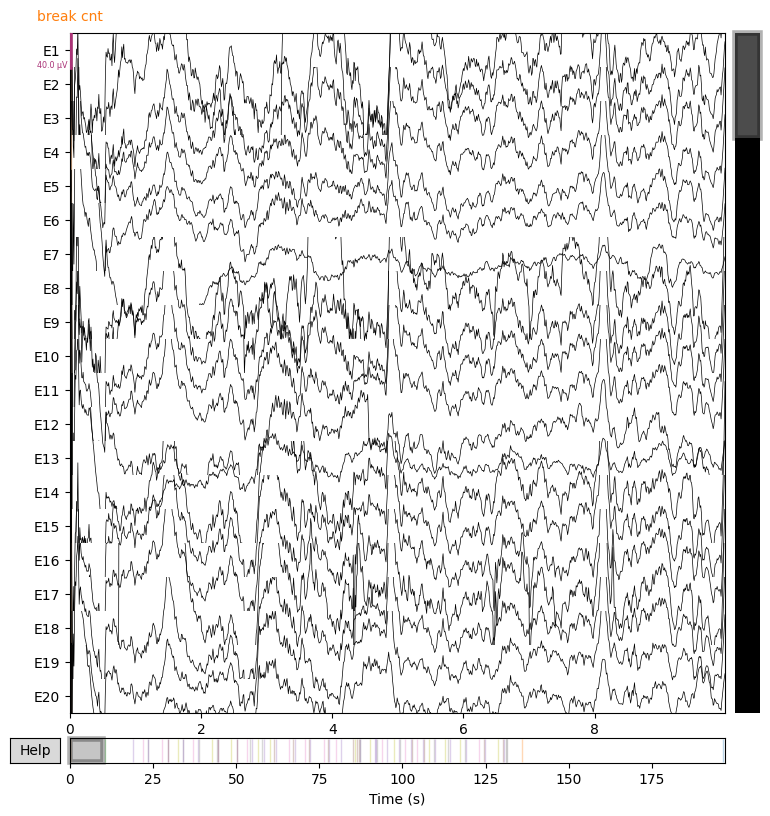

In [15]:
fig = raw.plot()

As you just realized, the eeg dash dataset object will download the dataset only when necessary, and in this case, only when we want to consume the raw data. To download all data directly, we recommend downloading the versions with Amazon API, or doing something like:

In [16]:
from joblib import Parallel, delayed

raws = Parallel(n_jobs=-1)(
    delayed(lambda d: d.raw)(d) for d in dataset_ccd.datasets
)

## 2. Creating the windows of interest

Now that we have our raw dataset, defining the windows/epoch interval is essential.

For this challenge, we test many different and semantically different regions of interest, and our preliminary studies show us that the most interesting area of interest is defined below:


*        stimulus         │        response         │        feedback
*                         │ *********************** (stimulus + 0.5)

So we epoch after the stimulus moment with a beginning shift of 500 ms.

In [17]:
# Grid search functions moved to bottom of notebook


In [18]:
# Grid search functions moved to bottom of notebook


In [19]:
# Grid search functions moved to bottom of notebook


In [20]:
# Grid search functions moved to bottom of notebook


In [21]:
# Grid search functions moved to bottom of notebook


In [22]:
#@title ▶️ Run this first to get all the utils functions for the epoching
from braindecode.datasets import BaseConcatDataset


So, on our raw data, we fit the events present in it, and create a window of interest.

In [23]:
from braindecode.preprocessing import preprocess, Preprocessor, create_windows_from_events
from eegdash.hbn.windows import (
    annotate_trials_with_target,
    add_aux_anchors,
    add_extras_columns,
    keep_only_recordings_with,
)

EPOCH_LEN_S = 2.0
SFREQ = 100 # by definition here

transformation_offline = [
    Preprocessor(
        annotate_trials_with_target,
        target_field="rt_from_stimulus", epoch_length=EPOCH_LEN_S,
        require_stimulus=True, require_response=True,
        apply_on_array=False,
    ),
    Preprocessor(add_aux_anchors, apply_on_array=False),
]
preprocess(dataset_ccd, transformation_offline, n_jobs=1)

ANCHOR = "stimulus_anchor"

SHIFT_AFTER_STIM = 0.5
WINDOW_LEN       = 2.0

# Keep only recordings that actually contain stimulus anchors
dataset = keep_only_recordings_with(ANCHOR, dataset_ccd)

# Create single-interval windows (stim-locked, long enough to include the response)
single_windows = create_windows_from_events(
    dataset,
    mapping={ANCHOR: 0},
    trial_start_offset_samples=int(SHIFT_AFTER_STIM * SFREQ),                 # +0.5 s
    trial_stop_offset_samples=int((SHIFT_AFTER_STIM + WINDOW_LEN) * SFREQ),   # +2.5 s
    window_size_samples=int(EPOCH_LEN_S * SFREQ),
    window_stride_samples=SFREQ,
    preload=True,
)

# Injecting metadata into the extra mne annotation.
single_windows = add_extras_columns(
    single_windows,
    dataset,
    desc=ANCHOR,
    keys=("target", "rt_from_stimulus", "rt_from_trialstart",
          "stimulus_onset", "response_onset", "correct", "response_type")
          )

Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: ['stimulus_anchor']
Used Annotations descriptions: 

Now that we have our windowed data, we can split it into the different sets that are needed for modeling. Since our challenge focuses on generalization across subjects, we recommend dividing at the subject level.

(1) the training set is used to learn the parameters of our deep learning model,  

(2) the validation set is used to monitor the training process and decide when to stop it, and  

(3) the test set is used to provide an estimate of the generalization performance of our model.

Here, we use the last 10% of windows for testing, 10% for validation and split the remaining 80% of windows into training.

**Here we go into the steps that you and your team must validate to obtain better results**

✅ Training function ready! Use train_and_save_model(model, model_num) to train and save.


In [24]:
# for each windows, we can extract the metainformation using:

meta_information = single_windows.get_metadata()

In [25]:
meta_information.head()

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,rt_from_stimulus,rt_from_trialstart,stimulus_onset,response_onset,correct,response_type,...,thepresent,diaryofawimpykid,contrastchangedetection_1,contrastchangedetection_2,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch
0,0,2241,2441,1.486,1.486,4.484,21.906,23.392,0,right_buttonPress,...,available,available,available,available,available,available,available,available,unavailable,caution
1,0,3284,3484,1.562,1.562,4.57,32.34,33.902,1,right_buttonPress,...,available,available,available,available,available,available,available,available,unavailable,caution
2,0,4322,4522,1.51,1.51,5.606,42.724,44.234,1,right_buttonPress,...,available,available,available,available,available,available,available,available,unavailable,caution
3,0,5360,5560,0.97,0.97,3.972,53.096,54.066,0,right_buttonPress,...,available,available,available,available,available,available,available,available,unavailable,caution
4,0,5714,5914,1.172,1.172,3.07,56.644,57.816,1,right_buttonPress,...,available,available,available,available,available,available,available,available,unavailable,caution


## You can inspect your target label doing:

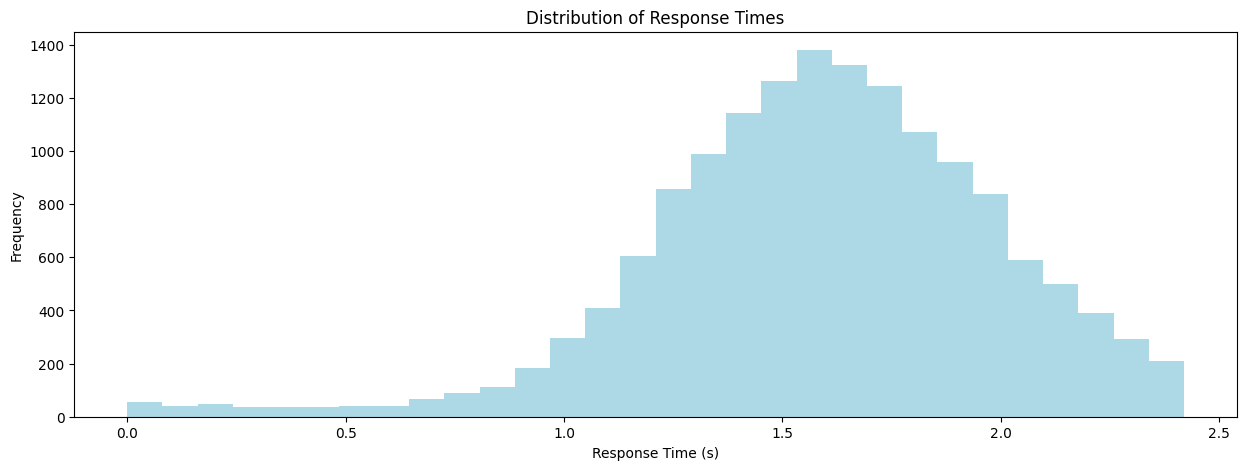

In [26]:
from matplotlib.pylab import plt

fig, ax = plt.subplots(figsize=(15, 5))
ax = meta_information["target"].plot.hist(bins=30, ax=ax, color='lightblue')
ax.set_xlabel("Response Time (s)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Response Times")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

valid_frac = 0.1
test_frac = 0.1
seed = 2025

subjects = meta_information["subject"].unique()
sub_rm = ["NDARWV769JM7", "NDARME789TD2", "NDARUA442ZVF", "NDARJP304NK1",
          "NDARTY128YLU", "NDARDW550GU6", "NDARLD243KRE", "NDARUJ292JXV", "NDARBA381JGH"]
subjects = [s for s in subjects if s not in sub_rm]

train_subj, valid_test_subject = train_test_split(
    subjects, test_size=(valid_frac + test_frac), random_state=check_random_state(seed), shuffle=True
)

valid_subj, test_subj = train_test_split(
    valid_test_subject, test_size=test_frac, random_state=check_random_state(seed + 1), shuffle=True
)
# sanity check
assert (set(valid_subj) | set(test_subj) | set(train_subj)) == set(subjects)

In [28]:
# and finally using braindecode split function, we can do:
subject_split = single_windows.split("subject")

train_set = []
valid_set = []
test_set = []

for s in subject_split:
    if s in train_subj:
        train_set.append(subject_split[s])
    elif s in valid_subj:
        valid_set.append(subject_split[s])
    elif s in test_subj:
        test_set.append(subject_split[s])

train_set = BaseConcatDataset(train_set)
valid_set = BaseConcatDataset(valid_set)
test_set = BaseConcatDataset(test_set)

print("Number of examples in each split in the minirelease")
print(f"Train:\t{len(train_set)}")
print(f"Valid:\t{len(valid_set)}")
print(f"Test:\t{len(test_set)}")

Number of examples in each split in the minirelease
Train:	12100
Valid:	2714
Test:	330


Finally, we create pytorch `DataLoader`s, which will be used to feed the data to the model during training and evaluation:

In [29]:
# Create datasets and dataloaders
from torch.utils.data import DataLoader

batch_size = 128
num_workers = 1 # We are using a single worker, but you can increase this for faster data loading

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)

## Building the deep learning model

For neural network models, **to start**, we suggest using [braindecode models](https://braindecode.org/1.2/models/models_table.html) zoo. We have implemented several different models for decoding the brain timeseries.

Your team's responsibility is to develop a PyTorch module that receives the three-dimensional (`batch`, `n_chans`, `n_times`) input and outputs the contrastive response time.

In [30]:
from braindecode.models.util import models_dict

names = sorted(models_dict)
w = max(len(n) for n in names)

for i in range(0, len(names), 3):
    row = names[i:i+3]
    print("  ".join(f"{n:<{w}}" for n in row))

ATCNet                  AttentionBaseNet        AttnSleep             
BDTCN                   BIOT                    CTNet                 
ContraWR                Deep4Net                DeepSleepNet          
EEGConformer            EEGITNet                EEGInceptionERP       
EEGInceptionMI          EEGMiner                EEGNeX                
EEGNet                  EEGSimpleConv           EEGTCNet              
FBCNet                  FBLightConvNet          FBMSNet               
IFNet                   Labram                  MSVTNet               
SCCNet                  SPARCNet                ShallowFBCSPNet       
SignalJEPA              SignalJEPA_Contextual   SignalJEPA_PostLocal  
SignalJEPA_PreLocal     SincShallowNet          SleepStagerBlanco2020 
SleepStagerChambon2018  SyncNet                 TIDNet                
TSception               USleep                


In [31]:
from braindecode.models import EEGMiner

model1 = EEGMiner(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model1)

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #                   Kernel Shape
EEGMiner (EEGMiner)                           [1, 129, 200]             [1, 1]                    --                        --
├─Rearrange (ensure_dim): 1-1                 [1, 129, 200]             [1, 129, 1, 200]          --                        --
├─GeneralizedGaussianFilter (filter): 1-2     [1, 129, 1, 200]          [1, 129, 2, 101, 2]       109                       --
├─BatchNorm1d (batch_layer): 1-3              [1, 16512]                [1, 16512]                --                        --
├─Linear (final_layer): 1-4                   [1, 16512]                [1, 1]                    16,513                    --
Total params: 16,622
Trainable params: 16,519
Non-trainable params: 103
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.10
Forward/backward pass size (MB): 0.42
Params size (MB): 0.07
Estimated Total Size (MB): 0.59


In [32]:
# for any braindecode model, you can initialize only inputing the signal related parameters
from braindecode.models import EEGNeX

model = EEGNeX(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

In [33]:
# the braindecode models have this convenient way to initialize with just the signal parameters
# and also some eegmodulemixin that allow to easily torch info once the model is created

print(model)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGNeX (EEGNeX)                                              [1, 129, 200]             [1, 1]                    --                        --
├─Sequential (block_1): 1-1                                  [1, 129, 200]             [1, 8, 129, 200]          --                        --
│    └─Rearrange (0): 2-1                                    [1, 129, 200]             [1, 1, 129, 200]          --                        --
│    └─Conv2d (1): 2-2                                       [1, 1, 129, 200]          [1, 8, 129, 200]          512                       [1, 64]
│    └─BatchNorm2d (2): 2-3                                  [1, 8, 129, 200]          [1, 8, 129, 200]          16                        --
├─Sequential (block_2): 1-2                                  [1, 8, 129, 200]          [1, 32, 129, 200]         --                  

/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1041.)
  return F.conv2d(input, weight, bias, self.stride,


### The rest is our classic PyTorch/torch lighting/skorch training pipeline

In [ ]:
# Defining training parameters
lr = 1E-3
weight_decay = 1E-5
n_epochs = 100
early_stopping_patience = 50

In [47]:
from typing import Optional
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.nn import Module
from torch.optim.lr_scheduler import LRScheduler
# Define a method for training one epoch
def train_one_epoch(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    optimizer,
    scheduler: Optional[LRScheduler],
    epoch: int,
    device,
    print_batch_stats: bool = True,
):
    model.train()

    total_loss = 0.0
    sum_sq_err = 0.0
    n_samples = 0

    progress_bar = tqdm(
        enumerate(dataloader), total=len(dataloader), disable=not print_batch_stats
    )

    for batch_idx, batch in progress_bar:
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()

        optimizer.zero_grad(set_to_none=True)
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Flatten to 1D for regression metrics and accumulate squared error
        preds_flat = preds.detach().view(-1)
        y_flat = y.detach().view(-1)
        sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
        n_samples += y_flat.numel()

        if print_batch_stats:
            running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
            progress_bar.set_description(
                f"Epoch {epoch}, Batch {batch_idx + 1}/{len(dataloader)}, "
                f"Loss: {loss.item():.6f}, RMSE: {running_rmse:.6f}"
            )

    if scheduler is not None:
        scheduler.step()

    avg_loss = total_loss / len(dataloader)
    rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
    return avg_loss, rmse

In [49]:
import torch
from torch.utils.data import DataLoader
from torch.nn import Module
from tqdm import tqdm

@torch.no_grad()
def valid_model(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    device,
    print_batch_stats: bool = True,
):
    model.eval()

    total_loss = 0.0
    sum_sq_err = 0.0
    n_batches = len(dataloader)
    n_samples = 0

    iterator = tqdm(
        enumerate(dataloader),
        total=n_batches,
        disable=not print_batch_stats
    )

    for batch_idx, batch in iterator:
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()
        # casting X to float32

        preds = model(X)
        batch_loss = loss_fn(preds, y).item()
        total_loss += batch_loss

        preds_flat = preds.detach().view(-1)
        y_flat = y.detach().view(-1)
        sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
        n_samples += y_flat.numel()

        if print_batch_stats:
            running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
            iterator.set_description(
                f"Val Batch {batch_idx + 1}/{n_batches}, "
                f"Loss: {batch_loss:.6f}, RMSE: {running_rmse:.6f}"
            )

    avg_loss = total_loss / n_batches if n_batches else float("nan")
    rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5

    print(f"Val RMSE: {rmse:.6f}, Val Loss: {avg_loss:.6f}\n")
    return avg_loss, rmse

In [173]:
import copy

# optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model.load_state_dict(best_state)


In [174]:
# torch.save(model.state_dict(), "weights_eegnex_10_28.pt")

In [35]:
# saving the model

# torch.save(model.state_dict(), "updated_model_10_27.pth")


In [36]:
from braindecode.models import EEGMiner

model1 = EEGMiner(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model1)

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #                   Kernel Shape
EEGMiner (EEGMiner)                           [1, 129, 200]             [1, 1]                    --                        --
├─Rearrange (ensure_dim): 1-1                 [1, 129, 200]             [1, 129, 1, 200]          --                        --
├─GeneralizedGaussianFilter (filter): 1-2     [1, 129, 1, 200]          [1, 129, 2, 101, 2]       109                       --
├─BatchNorm1d (batch_layer): 1-3              [1, 16512]                [1, 16512]                --                        --
├─Linear (final_layer): 1-4                   [1, 16512]                [1, 1]                    16,513                    --
Total params: 16,622
Trainable params: 16,519
Non-trainable params: 103
Total mult-adds (Units.MEGABYTES): 0.02
Input size (MB): 0.10
Forward/backward pass size (MB): 0.42
Params size (MB): 0.07
Estimated Total Size (MB): 0.59


In [177]:
# optimizer = torch.optim.AdamW(model1.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model1, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model1, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model1.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model1.load_state_dict(best_state)

In [178]:
# torch.save(model1.state_dict(), "eegminer_10_28.pt")

In [179]:
# torch.save(model1.state_dict(), "eegminer.pth")

In [37]:
from braindecode.models import EEGConformer
model2 = EEGConformer(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model2)

Layer (type (var_name):depth-idx)                                      Input Shape               Output Shape              Param #                   Kernel Shape
EEGConformer (EEGConformer)                                            [1, 129, 200]             [1, 1]                    --                        --
├─_PatchEmbedding (patch_embedding): 1-1                               [1, 1, 129, 200]          [1, 7, 40]                --                        --
│    └─Sequential (shallownet): 2-1                                    [1, 1, 129, 200]          [1, 40, 1, 7]             --                        --
│    │    └─Conv2d (0): 3-1                                            [1, 1, 129, 200]          [1, 40, 129, 176]         1,040                     [1, 25]
│    │    └─Conv2d (1): 3-2                                            [1, 40, 129, 176]         [1, 40, 1, 176]           206,440                   [129, 1]
│    │    └─BatchNorm2d (2): 3-3                                   

/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/braindecode/models/eegconformer.py:227: UserWarning: This model has only been tested on no more than 64 channels. no guarantee to work with more channels.
  warnings.warn(
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [181]:
# optimizer = torch.optim.AdamW(model2.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model2, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model2, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model2.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model2.load_state_dict(best_state)

In [182]:
# torch.save(model2.state_dict(), "eegconformer.pth")

In [183]:
# torch.save(model2.state_dict(), "weights_challenge_1_10_28.pt")

In [184]:
# save_model_as_pt(model, save_dir="models", filename=None)

In [185]:
# model_path = save_model_as_pt(
#     model=model2,
#     filename="eegconformer_final.pt"
# )

In [40]:
from braindecode.models import ATCNet
model3 = ATCNet(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model3)

Layer (type (var_name):depth-idx)                       Input Shape               Output Shape              Param #                   Kernel Shape
ATCNet (ATCNet)                                         [1, 129, 200]             [1, 1]                    --                        --
├─Ensure4d (ensuredims): 1-1                            [1, 129, 200]             [1, 129, 200, 1]          --                        --
├─Rearrange (dimshuffle): 1-2                           [1, 129, 200, 1]          [1, 1, 200, 129]          --                        --
├─_ConvBlock (conv_block): 1-3                          [1, 1, 200, 129]          [1, 32, 50, 1]            --                        --
│    └─Conv2d (conv1): 2-1                              [1, 1, 200, 129]          [1, 16, 200, 129]         320                       [20, 1]
│    └─BatchNorm2d (bn1): 2-2                           [1, 16, 200, 129]         [1, 16, 200, 129]         32                        --
│    └─Conv2d (conv2): 2-3

/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/braindecode/models/atcnet.py:285: UserWarning: n_times (200) is smaller than the minimum required (616) for the current model parameters configuration. Adjusting parameters to ensure compatibility.Reducing the kernel, pooling, and stride sizes accordingly.Scaling factor: 0.32
  warn(


In [187]:
# import torch
# optimizer = torch.optim.AdamW(model3.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model3, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model3, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model3.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model3.load_state_dict(best_state)

In [188]:
# torch.save(model3.state_dict(), "ATCNet_1_10_28.pt")

In [41]:
from braindecode.models import Deep4Net
model4 = Deep4Net(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model4)


Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #                   Kernel Shape
Deep4Net (Deep4Net)                           [1, 129, 200]             [1, 1]                    --                        --
├─Ensure4d (ensuredims): 1-1                  [1, 129, 200]             [1, 129, 200, 1]          --                        --
├─Rearrange (dimshuffle): 1-2                 [1, 129, 200, 1]          [1, 1, 200, 129]          --                        --
├─CombinedConv (conv_time_spat): 1-3          [1, 1, 200, 129]          [1, 25, 191, 1]           80,900                    --
├─BatchNorm2d (bnorm): 1-4                    [1, 25, 191, 1]           [1, 25, 191, 1]           50                        --
├─ELU (conv_nonlin): 1-5                      [1, 25, 191, 1]           [1, 25, 191, 1]           --                        --
├─MaxPool2d (pool): 1-6                       [1, 25, 191, 1]           [1, 25, 191, 1]           -- 

/Users/carinaxguo/ESE 5380/eeg_challenge/.venv/lib/python3.11/site-packages/braindecode/models/deep4.py:167: UserWarning: n_times (200) is smaller than the minimum required (441) for the current model parameters configuration. Adjusting parameters to ensure compatibility.Reducing the kernel, pooling, and stride sizes accordingly.Scaling factor: 0.45
  warn(


In [190]:
# import torch
# optimizer = torch.optim.AdamW(model4.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model4, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model4, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model4.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model4.load_state_dict(best_state)

In [191]:
# torch.save(model3.state_dict(), "Deep4Net_1_10_28.pt")

In [65]:
from braindecode.models import Labram
model5 = Labram(n_chans=129, # 129 channels
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )

print(model5)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
Labram (Labram)                                              [1, 129, 200]             [1, 1]                    --                        --
├─Sequential (patch_embed): 1-1                              --                        --                        (recursive)               --
│    └─_SegmentPatch (segment_patch): 2-1                    [1, 129, 200]             [1, 129, 1, 200]          --                        --
│    │    └─Rearrange (adding_extra_dim): 3-1                [1, 129, 200]             [129, 1, 200]             --                        --
│    │    └─Conv1d (patcher): 3-2                            [129, 1, 200]             [129, 200, 1]             40,200                    [200]
├─Sequential (patch_embed): 1-2                              [1, 129, 200]             [1, 129, 200]             40,200                

In [ ]:
# import torch
# optimizer = torch.optim.AdamW(model5.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model5, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model5, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model5.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model5.load_state_dict(best_state)

In [194]:
torch.save(model5.state_dict(), "Labram_10_29.pt")

In [59]:
# Get an mne.io.Raw from your data (adjust if your variable differs)
raw = dataset_ccd.datasets[0].raw
print(f"Channels: {len(raw.ch_names)}")
print(f"Duration: {raw.times[-1]:.1f}s")
print(f"Sampling rate: {raw.info['sfreq']} Hz")
print(f"Channel names: {raw.ch_names[:5]}...") 

# Build chs_info from actual channels
chs_info = []
for ch_idx, ch_name in enumerate(raw.ch_names):
    # Each channel has a dict in raw.info['chs']
    ch_dict = raw.info['chs'][ch_idx]
    ch_info = {
        'name': ch_name,
        'type': raw.get_channel_types(picks=[ch_name])[0],
        'loc': ch_dict.get('loc', [0.0, 0.0, 0.0])[:3]  # first three are (x,y,z) MNI location
    }
    chs_info.append(ch_info)

SFREQ = int(raw.info['sfreq'])  # e.g., 100
N_TIMES = 2 * SFREQ   

Channels: 129
Duration: 197.0s
Sampling rate: 100.0 Hz
Channel names: ['E1', 'E2', 'E3', 'E4', 'E5']...


In [60]:
from braindecode.models import SignalJEPA_Contextual
model6 = SignalJEPA_Contextual(n_chans=129, # 129 channels
                chs_info=chs_info, 
                n_outputs=1, # 1 output for regression
                n_times=200, #2 seconds
                sfreq=100,      # sample frequency 100 Hz
                )
print(model6)

Layer (type (var_name):depth-idx)                       Input Shape               Output Shape              Param #                   Kernel Shape
SignalJEPA_Contextual (SignalJEPA_Contextual)           [1, 129, 200]             [1, 1]                    --                        --
├─_ConvFeatureEncoder (feature_encoder): 1-1            [1, 129, 200]             [1, 129, 64]              --                        --
│    └─Rearrange (0): 2-1                               [1, 129, 200]             [129, 1, 200]             --                        --
│    └─Sequential (1): 2-2                              [129, 1, 200]             [129, 8, 22]              --                        --
│    │    └─Conv1d (0): 3-1                             [129, 1, 200]             [129, 8, 22]              256                       [32]
│    │    └─Dropout (1): 3-2                            [129, 8, 22]              [129, 8, 22]              --                        --
│    │    └─GroupNorm (2): 3-

In [197]:
# import torch
# optimizer = torch.optim.AdamW(model6.parameters(), lr=lr, weight_decay=weight_decay)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
# loss_fn = torch.nn.MSELoss()

# patience = 5
# min_delta = 1e-4
# best_rmse = float("inf")
# epochs_no_improve = 0
# best_state, best_epoch = None, None

# for epoch in range(1, n_epochs + 1):
#     print(f"Epoch {epoch}/{n_epochs}: ", end="")

#     train_loss, train_rmse = train_one_epoch(
#         train_loader, model6, loss_fn, optimizer, scheduler, epoch, device
#     )
#     val_loss, val_rmse = valid_model(test_loader, model6, loss_fn, device)

#     print(
#         f"Train RMSE: {train_rmse:.6f}, "
#         f"Average Train Loss: {train_loss:.6f}, "
#         f"Val RMSE: {val_rmse:.6f}, "
#         f"Average Val Loss: {val_loss:.6f}"
#     )

#     if val_rmse < best_rmse - min_delta:
#         best_rmse = val_rmse
#         best_state = copy.deepcopy(model6.state_dict())
#         best_epoch = epoch
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
#             break

# if best_state is not None:
#     model6.load_state_dict(best_state)

In [198]:
# torch.save(model6.state_dict(), "JEPRContextual_10_29.pt")

# Common questions:

1) Do I need to use only braindecode?

No! You can use any model that gets a tensor as input, outputs a tensor, and implements the forward method.

2) Can I apply extra preprocessing/dataset loader for the hidden data?
    
No, any transformation needs to be inside your model. but we are super open to contributions to the libraries (eggdash and braindecode) to accommodate any reasonable request.


In [199]:
# # =============================================================================
# # EEGConformer Fast Grid Search Functions
# # =============================================================================

# # Fast Grid Search for EEGConformer (Challenge 1)
# import itertools
# import copy
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import datetime
# import warnings
# warnings.filterwarnings('ignore')

# # FAST Grid Search Parameters - Optimized for speed
# FAST_GRID_PARAMS = {
#     'learning_rate': [0.0005, 0.001, 0.002],  # 3 values
#     'weight_decay': [1e-5, 1e-4, 1e-3],       # 3 values  
#     'batch_size': [64, 128],                   # 2 values
#     'n_epochs': [15, 25],                      # 2 values (reduced for speed)
#     'patience': [5, 8],                        # 2 values
# }

# # Training configuration
# TRAINING_CONFIG = {
#     'device': device,
#     'min_delta': 1e-4,
#     'save_best_model': True,
#     'verbose': True,
#     'print_batch_stats': False,  # Disable batch stats for speed
# }

# print("🚀 FAST Grid Search Parameters for EEGConformer:")
# for param, values in FAST_GRID_PARAMS.items():
#     print(f"  {param}: {values}")
# print(f"📊 Total combinations: {len(list(itertools.product(*FAST_GRID_PARAMS.values())))}")
# print(f"⏱️  Estimated time: ~{len(list(itertools.product(*FAST_GRID_PARAMS.values()))) * 2} minutes")


In [200]:
# # Optimized Training Function for EEGConformer Grid Search
# def train_eegconformer_fast(model, train_loader, val_loader, params, config):
#     """
#     Fast training function optimized for grid search
#     Uses existing train_one_epoch and valid_model functions
#     """
#     # Create fresh EEGConformer instance
#     model_copy = EEGConformer(
#         n_chans=129, 
#         n_outputs=1, 
#         n_times=200, 
#         sfreq=100
#     ).to(config['device'])
    
#     # Setup optimizer and scheduler
#     optimizer = torch.optim.AdamW(
#         model_copy.parameters(), 
#         lr=params['learning_rate'], 
#         weight_decay=params['weight_decay']
#     )
#     scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
#         optimizer, T_max=params['n_epochs'] - 1
#     )
#     loss_fn = torch.nn.MSELoss()
    
#     # Early stopping setup
#     patience = params['patience']
#     min_delta = config['min_delta']
#     best_rmse = float('inf')
#     epochs_no_improve = 0
#     best_state = None
#     best_epoch = 0
    
#     train_losses = []
#     val_losses = []
#     train_rmses = []
#     val_rmses = []
    
#     for epoch in range(1, params['n_epochs'] + 1):
#         # Training phase using existing function
#         train_loss, train_rmse = train_one_epoch(
#             train_loader, model_copy, loss_fn, optimizer, scheduler, epoch, config['device'],
#             print_batch_stats=config['print_batch_stats']
#         )
        
#         # Validation phase using existing function
#         val_loss, val_rmse = valid_model(
#             val_loader, model_copy, loss_fn, config['device'],
#             print_batch_stats=config['print_batch_stats']
#         )
        
#         # Store metrics
#         train_losses.append(train_loss)
#         val_losses.append(val_loss)
#         train_rmses.append(train_rmse)
#         val_rmses.append(val_rmse)
        
#         if config['verbose'] and epoch % 5 == 0:
#             print(f"  Epoch {epoch}: Train RMSE: {train_rmse:.6f}, Val RMSE: {val_rmse:.6f}")
        
#         # Early stopping check
#         if val_rmse < best_rmse - min_delta:
#             best_rmse = val_rmse
#             best_state = copy.deepcopy(model_copy.state_dict())
#             best_epoch = epoch
#             epochs_no_improve = 0
#         else:
#             epochs_no_improve += 1
#             if epochs_no_improve >= patience:
#                 if config['verbose']:
#                     print(f"  Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f}")
#                 break
    
#     # Load best model state
#     if best_state is not None:
#         model_copy.load_state_dict(best_state)
    
#     return {
#         'best_val_rmse': best_rmse,
#         'best_epoch': best_epoch,
#         'final_train_rmse': train_rmses[-1],
#         'final_val_rmse': val_rmses[-1],
#         'train_losses': train_losses,
#         'val_losses': val_losses,
#         'train_rmses': train_rmses,
#         'val_rmses': val_rmses,
#         'model_state': best_state
#     }

# print("✅ Fast EEGConformer training function ready!")


In [201]:
# # Fast Grid Search Execution for EEGConformer
# def run_fast_grid_search():
#     """
#     Execute fast grid search over EEGConformer parameters
#     """
#     # Generate all parameter combinations
#     param_names = list(FAST_GRID_PARAMS.keys())
#     param_values = list(FAST_GRID_PARAMS.values())
#     param_combinations = list(itertools.product(*param_values))
    
#     print(f"🚀 Starting FAST grid search with {len(param_combinations)} combinations...")
#     print(f"📊 Using existing train_loader and test_loader")
    
#     # Results storage
#     results = []
#     best_result = None
#     best_val_rmse = float('inf')
    
#     # Create timestamp for this run
#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
#     for i, param_combo in enumerate(param_combinations):
#         # Create parameter dictionary
#         params = dict(zip(param_names, param_combo))
        
#         print(f"\n{'='*50}")
#         print(f"🔄 Combination {i+1}/{len(param_combinations)}")
#         print(f"📋 Parameters: {params}")
#         print(f"{'='*50}")
        
#         try:
#             # Create data loaders with current batch size
#             train_loader_current = DataLoader(
#                 train_dataset, 
#                 batch_size=params['batch_size'], 
#                 shuffle=True, 
#                 num_workers=0
#             )
#             val_loader_current = DataLoader(
#                 test_dataset,  # Using test_dataset as validation
#                 batch_size=params['batch_size'], 
#                 shuffle=False, 
#                 num_workers=0
#             )
            
#             # Train EEGConformer
#             result = train_eegconformer_fast(
#                 model2, train_loader_current, val_loader_current, params, TRAINING_CONFIG
#             )
            
#             # Add parameter info to result
#             result.update(params)
#             result['combination_id'] = i + 1
#             result['timestamp'] = timestamp
            
#             # Store result
#             results.append(result)
            
#             # Check if this is the best result so far
#             if result['best_val_rmse'] < best_val_rmse:
#                 best_val_rmse = result['best_val_rmse']
#                 best_result = result.copy()
#                 print(f"🎉 NEW BEST! Val RMSE: {best_val_rmse:.6f}")
            
#             print(f"✅ Completed combination {i+1}. Best Val RMSE: {result['best_val_rmse']:.6f}")
            
#         except Exception as e:
#             print(f"❌ Error in combination {i+1}: {str(e)}")
#             # Store error result
#             error_result = {
#                 'combination_id': i + 1,
#                 'timestamp': timestamp,
#                 'error': str(e),
#                 'best_val_rmse': float('inf')
#             }
#             error_result.update(params)
#             results.append(error_result)
    
#     return results, best_result, timestamp

# print("✅ Fast grid search execution function ready!")


In [202]:
# # Results Analysis and Visualization for EEGConformer Grid Search
# def analyze_eegconformer_results(results, best_result, timestamp):
#     """
#     Analyze and visualize EEGConformer grid search results
#     """
#     # Convert results to DataFrame
#     df_results = pd.DataFrame(results)
    
#     # Remove columns with lists for cleaner analysis
#     columns_to_remove = ['train_losses', 'val_losses', 'train_rmses', 'val_rmses', 'model_state']
#     df_analysis = df_results.drop(columns=[col for col in columns_to_remove if col in df_results.columns])
    
#     # Sort by best validation RMSE
#     df_analysis = df_analysis.sort_values('best_val_rmse')
    
#     print("\n🏆 Top 10 EEGConformer Results:")
#     print("="*80)
#     top_10 = df_analysis.head(10)
#     for idx, row in top_10.iterrows():
#         print(f"Rank {row['combination_id']}: Val RMSE = {row['best_val_rmse']:.6f}")
#         print(f"  Params: LR={row['learning_rate']}, WD={row['weight_decay']}, BS={row['batch_size']}, Epochs={row['best_epoch']}")
#         print()
    
#     # Parameter importance analysis
#     print("\n📊 Parameter Analysis:")
#     print("="*50)
    
#     # Group by each parameter and calculate mean RMSE
#     for param in FAST_GRID_PARAMS.keys():
#         if param in df_analysis.columns:
#             param_stats = df_analysis.groupby(param)['best_val_rmse'].agg(['mean', 'std', 'count'])
#             print(f"\n{param.upper()}:")
#             print(param_stats)
    
#     # Create visualizations
#     plt.style.use('default')
#     fig, axes = plt.subplots(2, 3, figsize=(18, 12))
#     fig.suptitle(f'EEGConformer Fast Grid Search Results - {timestamp}', fontsize=16, fontweight='bold')
    
#     # 1. RMSE Distribution
#     axes[0, 0].hist(df_analysis['best_val_rmse'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
#     axes[0, 0].axvline(df_analysis['best_val_rmse'].min(), color='red', linestyle='--', linewidth=2, 
#                       label=f'Best: {df_analysis["best_val_rmse"].min():.6f}')
#     axes[0, 0].set_xlabel('Validation RMSE')
#     axes[0, 0].set_ylabel('Frequency')
#     axes[0, 0].set_title('Distribution of Validation RMSE')
#     axes[0, 0].legend()
#     axes[0, 0].grid(True, alpha=0.3)
    
#     # 2. Learning Rate vs RMSE
#     lr_rmse = df_analysis.groupby('learning_rate')['best_val_rmse'].agg(['mean', 'std']).reset_index()
#     axes[0, 1].errorbar(lr_rmse['learning_rate'], lr_rmse['mean'], yerr=lr_rmse['std'], 
#                        marker='o', capsize=5, capthick=2, linewidth=2)
#     axes[0, 1].set_xlabel('Learning Rate')
#     axes[0, 1].set_ylabel('Mean Validation RMSE')
#     axes[0, 1].set_title('Learning Rate vs Validation RMSE')
#     axes[0, 1].set_xscale('log')
#     axes[0, 1].grid(True, alpha=0.3)
    
#     # 3. Weight Decay vs RMSE
#     wd_rmse = df_analysis.groupby('weight_decay')['best_val_rmse'].agg(['mean', 'std']).reset_index()
#     axes[0, 2].errorbar(wd_rmse['weight_decay'], wd_rmse['mean'], yerr=wd_rmse['std'], 
#                        marker='s', capsize=5, capthick=2, linewidth=2, color='green')
#     axes[0, 2].set_xlabel('Weight Decay')
#     axes[0, 2].set_ylabel('Mean Validation RMSE')
#     axes[0, 2].set_title('Weight Decay vs Validation RMSE')
#     axes[0, 2].set_xscale('log')
#     axes[0, 2].grid(True, alpha=0.3)
    
#     # 4. Batch Size vs RMSE
#     bs_rmse = df_analysis.groupby('batch_size')['best_val_rmse'].agg(['mean', 'std']).reset_index()
#     axes[1, 0].bar(bs_rmse['batch_size'], bs_rmse['mean'], yerr=bs_rmse['std'], 
#                    capsize=5, alpha=0.7, color='orange', edgecolor='black')
#     axes[1, 0].set_xlabel('Batch Size')
#     axes[1, 0].set_ylabel('Mean Validation RMSE')
#     axes[1, 0].set_title('Batch Size vs Validation RMSE')
#     axes[1, 0].grid(True, alpha=0.3)
    
#     # 5. Epochs vs RMSE (scatter plot)
#     axes[1, 1].scatter(df_analysis['best_epoch'], df_analysis['best_val_rmse'], 
#                       alpha=0.6, c=df_analysis['learning_rate'], cmap='viridis', s=50)
#     axes[1, 1].set_xlabel('Best Epoch')
#     axes[1, 1].set_ylabel('Validation RMSE')
#     axes[1, 1].set_title('Best Epoch vs Validation RMSE\n(Color = Learning Rate)')
#     axes[1, 1].grid(True, alpha=0.3)
    
#     # Add colorbar for the scatter plot
#     cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
#     cbar.set_label('Learning Rate')
    
#     # 6. Top 5 Results Bar Chart
#     top_5 = df_analysis.head(5)
#     axes[1, 2].barh(range(len(top_5)), top_5['best_val_rmse'], color='lightcoral', alpha=0.7)
#     axes[1, 2].set_yticks(range(len(top_5)))
#     axes[1, 2].set_yticklabels([f"#{row['combination_id']}" for _, row in top_5.iterrows()])
#     axes[1, 2].set_xlabel('Validation RMSE')
#     axes[1, 2].set_title('Top 5 Best Results')
#     axes[1, 2].grid(True, alpha=0.3)
    
#     # Add RMSE values on bars
#     for i, v in enumerate(top_5['best_val_rmse']):
#         axes[1, 2].text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=8)
    
#     plt.tight_layout()
    
#     # Save the plot
#     plot_filename = f"eegconformer_grid_search_{timestamp}.png"
#     plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
#     print(f"📊 Visualization saved as: {plot_filename}")
    
#     plt.show()
    
#     # Save results
#     results_filename = f"eegconformer_grid_results_{timestamp}.json"
#     df_analysis.to_json(results_filename, orient='records', indent=2)
    
#     # Save best model
#     if best_result and 'model_state' in best_result:
#         best_model_filename = f"best_eegconformer_{timestamp}.pt"
#         torch.save(best_result['model_state'], best_model_filename)
#         print(f"💾 Best model saved as: {best_model_filename}")
    
#     print(f"📄 Results saved as: {results_filename}")
    
#     return df_analysis

# print("✅ Results analysis and visualization function ready!")


In [203]:
# # Apply Best Parameters Function
# def apply_best_parameters(best_result):
#     """
#     Apply the best parameters found in grid search to your main EEGConformer model
#     """
#     if best_result is None:
#         print("❌ No best result available")
#         return None
    
#     print("🎯 Applying best parameters to EEGConformer model...")
    
#     # Extract best parameters
#     best_lr = best_result['learning_rate']
#     best_wd = best_result['weight_decay']
#     best_bs = best_result['batch_size']
#     best_epochs = best_result['n_epochs']
#     best_patience = best_result['patience']
    
#     print(f"📋 Best Parameters:")
#     print(f"  Learning Rate: {best_lr}")
#     print(f"  Weight Decay: {best_wd}")
#     print(f"  Batch Size: {best_bs}")
#     print(f"  Max Epochs: {best_epochs}")
#     print(f"  Patience: {best_patience}")
#     print(f"  Best Validation RMSE: {best_result['best_val_rmse']:.6f}")
    
#     # Update your global variables (if you want to use them elsewhere)
#     global lr, weight_decay, n_epochs, patience
#     lr = best_lr
#     weight_decay = best_wd
#     n_epochs = best_epochs
#     patience = best_patience
    
#     print("✅ Global parameters updated!")
#     print("💡 You can now use these parameters for your main EEGConformer training")
    
#     return {
#         'lr': best_lr,
#         'weight_decay': best_wd,
#         'batch_size': best_bs,
#         'n_epochs': best_epochs,
#         'patience': best_patience,
#         'best_val_rmse': best_result['best_val_rmse']
#     }

# print("✅ Apply best parameters function ready!")


In [204]:
# # Define datasets for grid search (fix variable name mismatch)
# # The grid search expects train_dataset and test_dataset, but we have train_set, valid_set, test_set

# # Check if datasets exist
# if 'train_set' in locals() and 'test_set' in locals():
#     train_dataset = train_set
#     test_dataset = test_set
#     print(f"✅ Datasets defined for grid search:")
#     print(f"   Train: {len(train_dataset)} samples")
#     print(f"   Test: {len(test_dataset)} samples")
# else:
#     print("❌ train_set and test_set not found!")
#     print("Please run the data preparation cells first to create train_set, valid_set, and test_set")
#     print("Then run this cell again.")


In [205]:
# # 1. Run the grid search
# grid_results, best_model_result, run_timestamp = run_fast_grid_search()

# # 2. Analyze and visualize results
# results_df = analyze_eegconformer_results(grid_results, best_model_result, run_timestamp)

# # 3. Apply best parameters to your model (optional)
# best_params = apply_best_parameters(best_model_result)

In [206]:
# =============================================================================
# Custom Hybrid Model for Challenge 1: Response Time Prediction
# =============================================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange, reduce

class HybridEEGRegressor(nn.Module):
    """
    Hybrid CNN-Transformer model for EEG response time regression.
    Combines temporal-spatial convolutions with attention mechanisms.
    """
    def __init__(
        self,
        n_chans=129,
        n_times=200,
        n_outputs=1,
        sfreq=100,
        # CNN branch parameters
        n_filters_temporal=40,
        filter_time_length=25,
        n_filters_spatial=40,
        pool_time_length=75,
        pool_time_stride=15,
        # Transformer parameters
        embed_dim=128,
        num_heads=8,
        num_layers=4,
        dropout=0.3,
        # Feature fusion
        fusion_dim=256,
        # Regression head
        hidden_dim=128,
    ):
        super().__init__()
        self.n_chans = n_chans
        self.n_times = n_times
        self.n_outputs = n_outputs
        self.sfreq = sfreq
        
        # ========== CNN Feature Extractor Branch ==========
        # Temporal convolution
        self.conv_time = nn.Conv2d(
            1, n_filters_temporal,
            (1, filter_time_length),
            stride=1,
            padding=(0, filter_time_length // 2),
            bias=False
        )
        
        # Spatial convolution
        self.conv_spatial = nn.Conv2d(
            n_filters_temporal, n_filters_spatial,
            (n_chans, 1),
            bias=False
        )
        
        self.batch_norm = nn.BatchNorm2d(n_filters_spatial)
        self.activation = nn.ELU()
        
        # Pooling
        self.pool_time = nn.AvgPool2d(
            (1, pool_time_length),
            stride=(1, pool_time_stride)
        )
        self.dropout_cnn = nn.Dropout(dropout)
        
        # Calculate output dimensions after CNN
        # After pooling: spatial reduction
        # Assuming pooling reduces by factor of ~5
        self.cnn_out_dim = n_filters_spatial * (n_times // pool_time_stride)
        
        # ========== Transformer Branch ==========
        # Project to embedding dimension
        self.input_projection = nn.Linear(n_chans, embed_dim)
        
        # Positional encoding (learnable)
        self.pos_encoding = nn.Parameter(
            torch.randn(1, n_times, embed_dim)
        )
        
        # Transformer encoder layers
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=embed_dim * 4,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        
        # Transformer output projection
        self.transformer_proj = nn.Linear(embed_dim, embed_dim)
        
        # ========== Feature Fusion ==========
        self.fusion = nn.Sequential(
            nn.Linear(self.cnn_out_dim + embed_dim, fusion_dim),
            nn.BatchNorm1d(fusion_dim),
            nn.ELU(),
            nn.Dropout(dropout),
            nn.Linear(fusion_dim, fusion_dim // 2),
            nn.BatchNorm1d(fusion_dim // 2),
            nn.ELU(),
            nn.Dropout(dropout)
        )
        
        # ========== Regression Head ==========
        self.regression_head = nn.Sequential(
            nn.Linear(fusion_dim // 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ELU(),
            nn.Dropout(dropout * 0.5),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ELU(),
            nn.Dropout(dropout * 0.3),
            nn.Linear(hidden_dim // 2, n_outputs)
        )
        
        # Initialize regression head with small weights
        self._init_regression_head()
    
    def _init_regression_head(self):
        """Initialize regression head with small weights"""
        for module in self.regression_head:
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight, gain=0.1)
                nn.init.zeros_(module.bias)
    
    def forward(self, x):
        """
        Forward pass
        Args:
            x: (batch, n_chans, n_times)
        Returns:
            output: (batch, n_outputs)
        """
        batch_size = x.size(0)
        
        # ========== CNN Branch ==========
        # Add channel dimension: (batch, 1, n_chans, n_times)
        x_cnn = x.unsqueeze(1)
        
        # Temporal convolution
        x_cnn = self.conv_time(x_cnn)
        
        # Spatial convolution
        x_cnn = self.conv_spatial(x_cnn)
        x_cnn = self.batch_norm(x_cnn)
        x_cnn = self.activation(x_cnn)
        
        # Pooling
        x_cnn = self.pool_time(x_cnn)
        x_cnn = self.dropout_cnn(x_cnn)
        
        # Flatten: (batch, n_filters_spatial, 1, reduced_time)
        x_cnn = x_cnn.reshape(batch_size, -1)
        
        # ========== Transformer Branch ==========
        # Transpose for transformer: (batch, n_times, n_chans)
        x_trans = x.transpose(1, 2)
        
        # Project to embedding dimension
        x_trans = self.input_projection(x_trans)  # (batch, n_times, embed_dim)
        
        # Add positional encoding
        x_trans = x_trans + self.pos_encoding
        
        # Transformer encoding
        x_trans = self.transformer(x_trans)  # (batch, n_times, embed_dim)
        
        # Global pooling (mean + max)
        x_trans_mean = x_trans.mean(dim=1)  # (batch, embed_dim)
        x_trans_max = x_trans.max(dim=1)[0]  # (batch, embed_dim)
        x_trans = x_trans_mean + x_trans_max  # (batch, embed_dim)
        
        # Project
        x_trans = self.transformer_proj(x_trans)  # (batch, embed_dim)
        
        # ========== Feature Fusion ==========
        x_fused = torch.cat([x_cnn, x_trans], dim=1)  # (batch, cnn_out_dim + embed_dim)
        x_fused = self.fusion(x_fused)  # (batch, fusion_dim // 2)
        
        # ========== Regression ==========
        output = self.regression_head(x_fused)  # (batch, n_outputs)
        
        return output


# Test the model
print("🔬 Testing HybridEEGRegressor model...")
test_model = HybridEEGRegressor(
    n_chans=129,
    n_times=200,
    n_outputs=1,
    sfreq=100
).to(device)

# Test forward pass
test_input = torch.randn(4, 129, 200).to(device)
test_output = test_model(test_input)
print(f"✅ Model test successful!")
print(f"   Input shape: {test_input.shape}")
print(f"   Output shape: {test_output.shape}")
print(f"   Model parameters: {sum(p.numel() for p in test_model.parameters()):,}")
print(f"   Model size: {sum(p.numel() * 4 for p in test_model.parameters()) / 1024 / 1024:.2f} MB")


🔬 Testing HybridEEGRegressor model...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x488 and 648x256)

In [ ]:
# =============================================================================
# Data Augmentation for EEG
# =============================================================================

class EEGAugmentation(nn.Module):
    """
    Data augmentation for EEG signals during training.
    Includes common EEG-specific augmentations.
    """
    def __init__(
        self,
        noise_std=0.01,
        channel_dropout_prob=0.05,
        time_shift_prob=0.3,
        time_shift_max=10,
        amplitude_scale_range=(0.9, 1.1),
        apply_prob=0.5
    ):
        super().__init__()
        self.noise_std = noise_std
        self.channel_dropout_prob = channel_dropout_prob
        self.time_shift_prob = time_shift_prob
        self.time_shift_max = time_shift_max
        self.amplitude_scale_range = amplitude_scale_range
        self.apply_prob = apply_prob
    
    def forward(self, x):
        """
        Apply augmentations
        Args:
            x: (batch, n_chans, n_times)
        Returns:
            x_aug: (batch, n_chans, n_times)
        """
        if not self.training:
            return x
        
        batch_size, n_chans, n_times = x.shape
        
        # Random gaussian noise
        if torch.rand(1) < self.apply_prob:
            noise = torch.randn_like(x) * self.noise_std
            x = x + noise
        
        # Random channel dropout
        if torch.rand(1) < self.apply_prob:
            mask = torch.rand(batch_size, n_chans, 1, device=x.device) > self.channel_dropout_prob
            x = x * mask.float()
        
        # Random time shift
        if torch.rand(1) < self.time_shift_prob:
            shift = torch.randint(-self.time_shift_max, self.time_shift_max + 1, (1,)).item()
            if shift != 0:
                x = torch.roll(x, shift, dims=2)
        
        # Random amplitude scaling
        if torch.rand(1) < self.apply_prob:
            scale = torch.empty(batch_size, 1, 1, device=x.device).uniform_(
                self.amplitude_scale_range[0],
                self.amplitude_scale_range[1]
            )
            x = x * scale
        
        return x


# Test augmentation
print("🔬 Testing EEG Augmentation...")
aug = EEGAugmentation()
test_input = torch.randn(2, 129, 200)
aug.eval()
test_output_no_aug = aug(test_input)
aug.train()
test_output_aug = aug(test_input)
print(f"✅ Augmentation test successful!")
print(f"   Input shape: {test_input.shape}")
print(f"   Output shape (eval): {test_output_no_aug.shape}")
print(f"   Output shape (train): {test_output_aug.shape}")


🔬 Testing EEG Augmentation...
✅ Augmentation test successful!
   Input shape: torch.Size([2, 129, 200])
   Output shape (eval): torch.Size([2, 129, 200])
   Output shape (train): torch.Size([2, 129, 200])


In [ ]:
# =============================================================================
# Complete Training Pipeline with Transfer Learning
# =============================================================================

def train_with_transfer_learning(
    model,
    source_loader=None,
    target_train_loader=None,
    target_val_loader=None,
    device='cpu',
    # Pretraining parameters
    pretrain_epochs=20,
    pretrain_lr=1e-3,
    pretrain_weight_decay=1e-5,
    # Fine-tuning parameters
    finetune_epochs=50,
    finetune_lr=1e-4,
    finetune_weight_decay=1e-5,
    # General parameters
    patience=10,
    min_delta=1e-4,
    freeze_backbone=False,
    save_path=None
):
    """
    Complete training pipeline with pretraining and fine-tuning.
    
    Strategy:
    1. Pretrain on source data (multiple releases) - learns general EEG features
    2. Fine-tune on target data (CCD task) - adapts to specific response time prediction
    """
    import copy
    from tqdm import tqdm
    
    model = model.to(device)
    best_val_rmse = float('inf')
    best_state = None
    best_epoch = 0
    
    history = {
        'pretrain_loss': [],
        'pretrain_rmse': [],
        'finetune_train_loss': [],
        'finetune_train_rmse': [],
        'finetune_val_loss': [],
        'finetune_val_rmse': []
    }
    
    # ========== STEP 1: Pretraining on Source Data ==========
    if source_loader is not None:
        print("\\n" + "="*60)
        print("📚 STEP 1: Pretraining on Source Data")
        print("="*60)
        
        pretrain_optimizer = torch.optim.AdamW(
            model.parameters(),
            lr=pretrain_lr,
            weight_decay=pretrain_weight_decay
        )
        pretrain_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
            pretrain_optimizer, T_max=pretrain_epochs
        )
        loss_fn = torch.nn.MSELoss()
        
        model.train()
        for epoch in range(1, pretrain_epochs + 1):
            epoch_loss = 0.0
            sum_sq_err = 0.0
            n_samples = 0
            
            pbar = tqdm(source_loader, desc=f"Pretrain Epoch {epoch}/{pretrain_epochs}")
            for batch in pbar:
                X, y = batch[0], batch[1]
                X, y = X.to(device).float(), y.to(device).float()
                
                pretrain_optimizer.zero_grad()
                preds = model(X)
                loss = loss_fn(preds, y)
                loss.backward()
                pretrain_optimizer.step()
                
                epoch_loss += loss.item()
                preds_flat = preds.detach().view(-1)
                y_flat = y.detach().view(-1)
                sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
                n_samples += y_flat.numel()
                
                rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
                pbar.set_postfix({'Loss': f'{loss.item():.6f}', 'RMSE': f'{rmse:.6f}'})
            
            avg_loss = epoch_loss / len(source_loader)
            rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5
            
            history['pretrain_loss'].append(avg_loss)
            history['pretrain_rmse'].append(rmse)
            
            pretrain_scheduler.step()
            
            print(f"Pretrain Epoch {epoch}: Loss={avg_loss:.6f}, RMSE={rmse:.6f}")
    
    # ========== STEP 2: Fine-tuning on Target Data ==========
    if target_train_loader is not None and target_val_loader is not None:
        print("\\n" + "="*60)
        print("🎯 STEP 2: Fine-tuning on Target Data")
        print("="*60)
        
        # Optionally freeze backbone layers
        if freeze_backbone:
            print("🔒 Freezing backbone layers...")
            for name, param in model.named_parameters():
                if 'regression_head' not in name and 'fusion' not in name:
                    param.requires_grad = False
        
        finetune_optimizer = torch.optim.AdamW(
            [p for p in model.parameters() if p.requires_grad],
            lr=finetune_lr,
            weight_decay=finetune_weight_decay
        )
        finetune_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            finetune_optimizer, mode='min', factor=0.5, patience=5, verbose=True
        )
        loss_fn = torch.nn.MSELoss()
        
        epochs_no_improve = 0
        
        for epoch in range(1, finetune_epochs + 1):
            # Training phase
            model.train()
            train_loss = 0.0
            train_sq_err = 0.0
            train_n_samples = 0
            
            pbar = tqdm(target_train_loader, desc=f"Finetune Train Epoch {epoch}/{finetune_epochs}")
            for batch in pbar:
                X, y = batch[0], batch[1]
                X, y = X.to(device).float(), y.to(device).float()
                
                finetune_optimizer.zero_grad()
                preds = model(X)
                loss = loss_fn(preds, y)
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                
                finetune_optimizer.step()
                
                train_loss += loss.item()
                preds_flat = preds.detach().view(-1)
                y_flat = y.detach().view(-1)
                train_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
                train_n_samples += y_flat.numel()
                
                train_rmse = (train_sq_err / max(train_n_samples, 1)) ** 0.5
                pbar.set_postfix({'Loss': f'{loss.item():.6f}', 'RMSE': f'{train_rmse:.6f}'})
            
            avg_train_loss = train_loss / len(target_train_loader)
            train_rmse = (train_sq_err / max(train_n_samples, 1)) ** 0.5
            
            # Validation phase
            model.eval()
            val_loss = 0.0
            val_sq_err = 0.0
            val_n_samples = 0
            
            with torch.no_grad():
                for batch in target_val_loader:
                    X, y = batch[0], batch[1]
                    X, y = X.to(device).float(), y.to(device).float()
                    
                    preds = model(X)
                    loss = loss_fn(preds, y)
                    
                    val_loss += loss.item()
                    preds_flat = preds.view(-1)
                    y_flat = y.view(-1)
                    val_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
                    val_n_samples += y_flat.numel()
            
            avg_val_loss = val_loss / len(target_val_loader)
            val_rmse = (val_sq_err / max(val_n_samples, 1)) ** 0.5
            
            history['finetune_train_loss'].append(avg_train_loss)
            history['finetune_train_rmse'].append(train_rmse)
            history['finetune_val_loss'].append(avg_val_loss)
            history['finetune_val_rmse'].append(val_rmse)
            
            finetune_scheduler.step(val_rmse)
            
            print(f"Epoch {epoch}: Train RMSE={train_rmse:.6f}, Val RMSE={val_rmse:.6f}")
            
            # Early stopping and best model tracking
            if val_rmse < best_val_rmse - min_delta:
                best_val_rmse = val_rmse
                best_state = copy.deepcopy(model.state_dict())
                best_epoch = epoch
                epochs_no_improve = 0
                print(f"✅ New best model! Val RMSE: {best_val_rmse:.6f}")
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    print(f"\\n⏹️  Early stopping at epoch {epoch}")
                    print(f"Best Val RMSE: {best_val_rmse:.6f} (epoch {best_epoch})")
                    break
        
        # Load best model
        if best_state is not None:
            model.load_state_dict(best_state)
            print(f"\\n✅ Loaded best model from epoch {best_epoch}")
    
    # Save model
    if save_path and best_state is not None:
        torch.save(best_state, save_path)
        print(f"💾 Model saved to: {save_path}")
    
    return model, history

print("✅ Training pipeline ready!")
print("💡 Use train_with_transfer_learning() for complete training workflow")


✅ Training pipeline ready!
💡 Use train_with_transfer_learning() for complete training workflow


In [ ]:
# =============================================================================
# Example: Training the Hybrid Model
# =============================================================================

# Create the model
model_hybrid = HybridEEGRegressor(
    n_chans=129,
    n_times=200,
    n_outputs=1,
    sfreq=100,
    dropout=0.3
).to(device)

print("🚀 HybridEEGRegressor Model Created!")
print(f"   Parameters: {sum(p.numel() for p in model_hybrid.parameters()):,}")
print(f"   Model size: {sum(p.numel() * 4 for p in model_hybrid.parameters()) / 1024 / 1024:.2f} MB")

# Uncomment to train (make sure you have train_set, valid_set, test_set ready):
# trained_model, history = train_with_transfer_learning(
#     model=model_hybrid,
#     source_loader=None,  # Set to source_loader if you have pretraining data
#     target_train_loader=train_loader,
#     target_val_loader=valid_loader,
#     device=device,
#     pretrain_epochs=20,
#     finetune_epochs=50,
#     finetune_lr=1e-4,
#     finetune_weight_decay=1e-5,
#     patience=10,
#     save_path="weights_challenge_1_hybrid.pt"
# )

print("\\n💡 Ready to train! Uncomment the training code above when ready.")


NameError: name 'HybridEEGRegressor' is not defined

# NEW


In [64]:
# Unified training function that saves weights and JSON files
import copy
import json
import os
import torch

lr = 0.002
weight_decay = 0.001
n_epochs = 25
patience = 8


def train_and_save_model(model, model_num, save_dir="new_run", 
                         train_loader=train_loader, valid_loader=valid_loader,
                         lr=lr, weight_decay=weight_decay, n_epochs=n_epochs,
                         device=device, patience=5, min_delta=1e-4):
    """
    Train a model and save weights + JSON with train/val RMSE
    
    Args:
        model: PyTorch model to train
        model_num: Model number (1-6)
        save_dir: Directory to save files (default: "new_run")
        Other args: Training hyperparameters
    
    Returns:
        (final_train_rmse, final_val_rmse)
    """
    # Create save directory
    os.makedirs(save_dir, exist_ok=True)
    
    # Setup training
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
    loss_fn = torch.nn.MSELoss()
    
    # Early stopping
    best_rmse = float("inf")
    epochs_no_improve = 0
    best_state, best_epoch = None, None
    
    print(f"\n{'='*60}")
    print(f"Training Model {model_num}")
    print(f"{'='*60}")
    
    # Training loop
    for epoch in range(1, n_epochs + 1):
        print(f"Epoch {epoch}/{n_epochs}: ", end="")
        
        train_loss, train_rmse = train_one_epoch(
            train_loader, model, loss_fn, optimizer, scheduler, epoch, device
        )
        val_loss, val_rmse = valid_model(valid_loader, model, loss_fn, device)
        
        print(
            f"Train RMSE: {train_rmse:.6f}, "
            f"Average Train Loss: {train_loss:.6f}, "
            f"Val RMSE: {val_rmse:.6f}, "
            f"Average Val Loss: {val_loss:.6f}"
        )
        
        if val_rmse < best_rmse - min_delta:
            best_rmse = val_rmse
            best_state = copy.deepcopy(model.state_dict())
            best_epoch = epoch
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping at epoch {epoch}. Best Val RMSE: {best_rmse:.6f} (epoch {best_epoch})")
                break
    
    # Load best model
    if best_state is not None:
        model.load_state_dict(best_state)
    
    # Get final train/val RMSE with best model
    model.eval()
    with torch.no_grad():
        # Final train RMSE
        train_sum_sq_err, train_n = 0.0, 0
        for batch in train_loader:
            X, y = batch[0], batch[1]
            X, y = X.to(device).float(), y.to(device).float()
            pred = model(X)
            pred_flat = pred.view(-1)
            y_flat = y.view(-1)
            train_sum_sq_err += torch.sum((pred_flat - y_flat) ** 2).item()
            train_n += y_flat.numel()
        final_train_rmse = (train_sum_sq_err / max(train_n, 1)) ** 0.5
        
        # Final val RMSE
        val_sum_sq_err, val_n = 0.0, 0
        for batch in valid_loader:
            X, y = batch[0], batch[1]
            X, y = X.to(device).float(), y.to(device).float()
            pred = model(X)
            pred_flat = pred.view(-1)
            y_flat = y.view(-1)
            val_sum_sq_err += torch.sum((pred_flat - y_flat) ** 2).item()
            val_n += y_flat.numel()
        final_val_rmse = (val_sum_sq_err / max(val_n, 1)) ** 0.5
    
    # Save weights
    weight_path = os.path.join(save_dir, f"model{model_num}.pth")
    torch.save(model.state_dict(), weight_path)
    print(f"\n✅ Saved weights: {weight_path}")
    
    # Save JSON with RMSEs
    json_path = os.path.join(save_dir, f"model{model_num}.json")
    results = {
        "model_num": model_num,
        "train_rmse": float(final_train_rmse),
        "val_rmse": float(final_val_rmse),
        "best_epoch": best_epoch,
        "best_val_rmse": float(best_rmse)
    }
    with open(json_path, 'w') as f:
        json.dump(results, f, indent=2)
    print(f"✅ Saved results: {json_path}")
    print(f"   Train RMSE: {final_train_rmse:.6f}, Val RMSE: {final_val_rmse:.6f}\n")
    
    return final_train_rmse, final_val_rmse

print("✅ Training function ready! Use train_and_save_model(model, model_num) to train and save.")


✅ Training function ready! Use train_and_save_model(model, model_num) to train and save.


In [ ]:
# Train all 6 models and save weights + JSON files
# Make sure models 1, 2, 5 are already defined above
# We'll define models 3, 4, 6 here if not already defined

from braindecode.models import ATCNet, Deep4Net, SignalJEPA_Contextual

# Train all models
print("\n" + "="*60)
print("Starting training for all 6 models")
print("="*60)

# Model 1
model1 = model1.to(device)
train_rmse1, val_rmse1 = train_and_save_model(model1, model_num=1)

# Model 2
model2 = model2.to(device)
train_rmse2, val_rmse2 = train_and_save_model(model2, model_num=2)

# Model 3
model3 = model3.to(device)
train_rmse3, val_rmse3 = train_and_save_model(model3, model_num=3)

# Model 4
model4 = model4.to(device)
train_rmse4, val_rmse4 = train_and_save_model(model4, model_num=4)

# Model 5

model5 = model5.to(device)
train_rmse5, val_rmse5 = train_and_save_model(model5, model_num=5)

# Model 6
model6 = model6.to(device)
train_rmse6, val_rmse6 = train_and_save_model(model6, model_num=6)

print("\n" + "="*60)
print("All models trained and saved!")
print("="*60)
print(f"Model 1 - Train RMSE: {train_rmse1:.6f}, Val RMSE: {val_rmse1:.6f}")
print(f"Model 2 - Train RMSE: {train_rmse2:.6f}, Val RMSE: {val_rmse2:.6f}")
print(f"Model 3 - Train RMSE: {train_rmse3:.6f}, Val RMSE: {val_rmse3:.6f}")
print(f"Model 4 - Train RMSE: {train_rmse4:.6f}, Val RMSE: {val_rmse4:.6f}")
print(f"Model 5 - Train RMSE: {train_rmse5:.6f}, Val RMSE: {val_rmse5:.6f}")
print(f"Model 6 - Train RMSE: {train_rmse6:.6f}, Val RMSE: {val_rmse6:.6f}")
print(f"\n✅ All files saved in 'new_run' folder:")
print("   - model1.pth, model1.json")
print("   - model2.pth, model2.json")
print("   - model3.pth, model3.json")
print("   - model4.pth, model4.json")
print("   - model5.pth, model5.json")
print("   - model6.pth, model6.json")



Starting training for all 6 models

Training Model 1
Epoch 1/100: 

Epoch 1, Batch 95/95, Loss: 2.069335, RMSE: 3.703007: 100%|██████████| 95/95 [01:04<00:00,  1.48it/s] 
Val Batch 22/22, Loss: 1.368554, RMSE: 1.512383: 100%|██████████| 22/22 [00:10<00:00,  2.18it/s]

Val RMSE: 1.512383, Val Loss: 2.254023

Train RMSE: 3.703007, Average Train Loss: 13.654810, Val RMSE: 1.512383, Average Val Loss: 2.254023
Epoch 2/100: 


Epoch 2, Batch 95/95, Loss: 1.831715, RMSE: 1.426865: 100%|██████████| 95/95 [01:03<00:00,  1.49it/s]
Val Batch 22/22, Loss: 1.190104, RMSE: 1.383212: 100%|██████████| 22/22 [00:10<00:00,  2.04it/s]

Val RMSE: 1.383212, Val Loss: 1.887081

Train RMSE: 1.426865, Average Train Loss: 2.034935, Val RMSE: 1.383212, Average Val Loss: 1.887081
Epoch 3/100: 


Epoch 3, Batch 95/95, Loss: 1.640504, RMSE: 1.335946: 100%|██████████| 95/95 [01:04<00:00,  1.46it/s]
Val Batch 22/22, Loss: 1.029516, RMSE: 1.281561: 100%|██████████| 22/22 [00:11<00:00,  1.96it/s]

Val RMSE: 1.281561, Val Loss: 1.620198

Train RMSE: 1.335946, Average Train Loss: 1.784040, Val RMSE: 1.281561, Average Val Loss: 1.620198
Epoch 4/100: 


Epoch 4, Batch 95/95, Loss: 1.555706, RMSE: 1.257318: 100%|██████████| 95/95 [01:02<00:00,  1.52it/s]
Val Batch 22/22, Loss: 0.871659, RMSE: 1.197442: 100%|██████████| 22/22 [00:10<00:00,  2.08it/s]

Val RMSE: 1.197442, Val Loss: 1.413502

Train RMSE: 1.257318, Average Train Loss: 1.580725, Val RMSE: 1.197442, Average Val Loss: 1.413502
Epoch 5/100: 


Epoch 5, Batch 95/95, Loss: 1.270976, RMSE: 1.172268: 100%|██████████| 95/95 [05:35<00:00,  3.53s/it]  
Val Batch 22/22, Loss: 0.704532, RMSE: 1.127216: 100%|██████████| 22/22 [00:10<00:00,  2.08it/s]

Val RMSE: 1.127216, Val Loss: 1.250112

Train RMSE: 1.172268, Average Train Loss: 1.373703, Val RMSE: 1.127216, Average Val Loss: 1.250112
Epoch 6/100: 


Epoch 6, Batch 95/95, Loss: 1.105250, RMSE: 1.105413: 100%|██████████| 95/95 [01:04<00:00,  1.47it/s]
Val Batch 22/22, Loss: 0.621190, RMSE: 1.056404: 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]

Val RMSE: 1.056404, Val Loss: 1.098066

Train RMSE: 1.105413, Average Train Loss: 1.221361, Val RMSE: 1.056404, Average Val Loss: 1.098066
Epoch 7/100: 


Epoch 7, Batch 95/95, Loss: 1.021901, RMSE: 1.072111: 100%|██████████| 95/95 [01:01<00:00,  1.55it/s]
Val Batch 22/22, Loss: 0.648608, RMSE: 1.442846: 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

Val RMSE: 1.442846, Val Loss: 2.029892

Train RMSE: 1.072111, Average Train Loss: 1.148793, Val RMSE: 1.442846, Average Val Loss: 2.029892
Epoch 8/100: 


Epoch 8, Batch 95/95, Loss: 0.797465, RMSE: 1.120513: 100%|██████████| 95/95 [01:00<00:00,  1.57it/s]
Val Batch 22/22, Loss: 0.366442, RMSE: 0.953271: 100%|██████████| 22/22 [00:10<00:00,  2.17it/s]

Val RMSE: 0.953271, Val Loss: 0.889083

Train RMSE: 1.120513, Average Train Loss: 1.253288, Val RMSE: 0.953271, Average Val Loss: 0.889083
Epoch 9/100: 


Epoch 9, Batch 95/95, Loss: 0.717590, RMSE: 0.934564: 100%|██████████| 95/95 [01:00<00:00,  1.58it/s]
Val Batch 22/22, Loss: 0.294976, RMSE: 0.901592: 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]

Val RMSE: 0.901592, Val Loss: 0.794110

Train RMSE: 0.934564, Average Train Loss: 0.872641, Val RMSE: 0.901592, Average Val Loss: 0.794110
Epoch 10/100: 


Epoch 10, Batch 95/95, Loss: 0.842614, RMSE: 0.872561: 100%|██████████| 95/95 [01:01<00:00,  1.56it/s]
Val Batch 22/22, Loss: 0.228202, RMSE: 0.856972: 100%|██████████| 22/22 [00:10<00:00,  2.17it/s]

Val RMSE: 0.856972, Val Loss: 0.716066

Train RMSE: 0.872561, Average Train Loss: 0.761764, Val RMSE: 0.856972, Average Val Loss: 0.716066
Epoch 11/100: 


Epoch 11, Batch 95/95, Loss: 0.739598, RMSE: 0.845325: 100%|██████████| 95/95 [01:03<00:00,  1.50it/s]
Val Batch 22/22, Loss: 0.211810, RMSE: 0.738903: 100%|██████████| 22/22 [00:12<00:00,  1.72it/s]

Val RMSE: 0.738903, Val Loss: 0.533874

Train RMSE: 0.845325, Average Train Loss: 0.714698, Val RMSE: 0.738903, Average Val Loss: 0.533874
Epoch 12/100: 


Epoch 12, Batch 95/95, Loss: 0.671738, RMSE: 0.862612: 100%|██████████| 95/95 [01:00<00:00,  1.57it/s]
Val Batch 22/22, Loss: 0.221576, RMSE: 0.961083: 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

Val RMSE: 0.961083, Val Loss: 0.898250

Train RMSE: 0.862612, Average Train Loss: 0.743743, Val RMSE: 0.961083, Average Val Loss: 0.898250
Epoch 13/100: 


Epoch 13, Batch 95/95, Loss: 0.429834, RMSE: 0.730151: 100%|██████████| 95/95 [01:01<00:00,  1.55it/s]
Val Batch 22/22, Loss: 0.108014, RMSE: 0.733678: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s]

Val RMSE: 0.733678, Val Loss: 0.522699

Train RMSE: 0.730151, Average Train Loss: 0.532611, Val RMSE: 0.733678, Average Val Loss: 0.522699
Epoch 14/100: 


Epoch 14, Batch 95/95, Loss: 1.681802, RMSE: 1.150529: 100%|██████████| 95/95 [00:59<00:00,  1.59it/s] 
Val Batch 22/22, Loss: 0.093808, RMSE: 0.710088: 100%|██████████| 22/22 [00:11<00:00,  1.96it/s]

Val RMSE: 0.710088, Val Loss: 0.489359

Train RMSE: 1.150529, Average Train Loss: 1.325484, Val RMSE: 0.710088, Average Val Loss: 0.489359
Epoch 15/100: 


Epoch 15, Batch 95/95, Loss: 0.359910, RMSE: 0.675507: 100%|██████████| 95/95 [01:01<00:00,  1.56it/s]
Val Batch 22/22, Loss: 0.088521, RMSE: 0.595176: 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

Val RMSE: 0.595176, Val Loss: 0.344609

Train RMSE: 0.675507, Average Train Loss: 0.455834, Val RMSE: 0.595176, Average Val Loss: 0.344609
Epoch 16/100: 


Epoch 16, Batch 95/95, Loss: 0.253451, RMSE: 1.196385: 100%|██████████| 95/95 [00:59<00:00,  1.59it/s] 
Val Batch 22/22, Loss: 0.084715, RMSE: 0.820565: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]

Val RMSE: 0.820565, Val Loss: 0.652006

Train RMSE: 1.196385, Average Train Loss: 1.425524, Val RMSE: 0.820565, Average Val Loss: 0.652006
Epoch 17/100: 


Epoch 17, Batch 95/95, Loss: 0.318212, RMSE: 0.659288: 100%|██████████| 95/95 [00:59<00:00,  1.60it/s]
Val Batch 22/22, Loss: 0.066266, RMSE: 0.591287: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]

Val RMSE: 0.591287, Val Loss: 0.339357

Train RMSE: 0.659288, Average Train Loss: 0.434086, Val RMSE: 0.591287, Average Val Loss: 0.339357
Epoch 18/100: 


Epoch 18, Batch 95/95, Loss: 7.893570, RMSE: 1.806760: 100%|██████████| 95/95 [01:00<00:00,  1.57it/s] 
Val Batch 22/22, Loss: 0.070085, RMSE: 0.967476: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]

Val RMSE: 0.967476, Val Loss: 0.904645

Train RMSE: 1.806760, Average Train Loss: 3.287224, Val RMSE: 0.967476, Average Val Loss: 0.904645
Epoch 19/100: 


Epoch 19, Batch 95/95, Loss: 0.226916, RMSE: 0.853415: 100%|██████████| 95/95 [01:01<00:00,  1.56it/s]
Val Batch 22/22, Loss: 0.068244, RMSE: 1.694391: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s] 

Val RMSE: 1.694391, Val Loss: 2.769443

Train RMSE: 0.853415, Average Train Loss: 0.725844, Val RMSE: 1.694391, Average Val Loss: 2.769443
Epoch 20/100: 


Epoch 20, Batch 95/95, Loss: 0.268949, RMSE: 0.778206: 100%|██████████| 95/95 [01:04<00:00,  1.47it/s]
Val Batch 22/22, Loss: 0.054580, RMSE: 0.508537: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]

Val RMSE: 0.508537, Val Loss: 0.251220

Train RMSE: 0.778206, Average Train Loss: 0.603944, Val RMSE: 0.508537, Average Val Loss: 0.251220
Epoch 21/100: 


Epoch 21, Batch 95/95, Loss: 0.312016, RMSE: 0.553762: 100%|██████████| 95/95 [01:04<00:00,  1.48it/s]
Val Batch 22/22, Loss: 0.055796, RMSE: 0.478192: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]

Val RMSE: 0.478192, Val Loss: 0.222406

Train RMSE: 0.553762, Average Train Loss: 0.306679, Val RMSE: 0.478192, Average Val Loss: 0.222406
Epoch 22/100: 


Epoch 22, Batch 95/95, Loss: 0.217798, RMSE: 0.571374: 100%|██████████| 95/95 [01:04<00:00,  1.48it/s]
Val Batch 22/22, Loss: 0.064182, RMSE: 0.456696: 100%|██████████| 22/22 [00:10<00:00,  2.07it/s]

Val RMSE: 0.456696, Val Loss: 0.203342

Train RMSE: 0.571374, Average Train Loss: 0.325932, Val RMSE: 0.456696, Average Val Loss: 0.203342
Epoch 23/100: 


Epoch 23, Batch 95/95, Loss: 0.195591, RMSE: 0.484995: 100%|██████████| 95/95 [01:06<00:00,  1.42it/s]
Val Batch 22/22, Loss: 0.068838, RMSE: 0.477938: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]

Val RMSE: 0.477938, Val Loss: 0.222644

Train RMSE: 0.484995, Average Train Loss: 0.235025, Val RMSE: 0.477938, Average Val Loss: 0.222644
Epoch 24/100: 


Epoch 24, Batch 95/95, Loss: 0.191360, RMSE: 2.084209: 100%|██████████| 95/95 [01:04<00:00,  1.46it/s] 
Val Batch 22/22, Loss: 0.159051, RMSE: 1.471540: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s] 

Val RMSE: 1.471540, Val Loss: 2.092756

Train RMSE: 2.084209, Average Train Loss: 4.323439, Val RMSE: 1.471540, Average Val Loss: 2.092756
Epoch 25/100: 


Epoch 25, Batch 95/95, Loss: 1.965358, RMSE: 3.367593: 100%|██████████| 95/95 [01:05<00:00,  1.44it/s]  
Val Batch 22/22, Loss: 1.288240, RMSE: 92.747224: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]      

Val RMSE: 92.747224, Val Loss: 8290.514357

Train RMSE: 3.367593, Average Train Loss: 11.294424, Val RMSE: 92.747224, Average Val Loss: 8290.514357
Epoch 26/100: 


Epoch 26, Batch 95/95, Loss: 0.292107, RMSE: 1.649492: 100%|██████████| 95/95 [01:07<00:00,  1.41it/s] 
Val Batch 22/22, Loss: 0.054168, RMSE: 47.006371: 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]    

Val RMSE: 47.006371, Val Loss: 2129.565732

Train RMSE: 1.649492, Average Train Loss: 2.708841, Val RMSE: 47.006371, Average Val Loss: 2129.565732
Epoch 27/100: 


Epoch 27, Batch 95/95, Loss: 0.372378, RMSE: 6.770064: 100%|██████████| 95/95 [01:05<00:00,  1.45it/s]   
Val Batch 22/22, Loss: 2.196322, RMSE: 473.620532: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s]      

Val RMSE: 473.620532, Val Loss: 216191.390327

Train RMSE: 6.770064, Average Train Loss: 45.609446, Val RMSE: 473.620532, Average Val Loss: 216191.390327
Early stopping at epoch 27. Best Val RMSE: 0.456696 (epoch 22)



✅ Saved weights: new_run/model1.pth
✅ Saved results: new_run/model1.json
   Train RMSE: 0.449085, Val RMSE: 0.456696


Training Model 2
Epoch 1/100: 

Epoch 1, Batch 95/95, Loss: 0.232402, RMSE: 0.560028: 100%|██████████| 95/95 [01:26<00:00,  1.09it/s]
Val Batch 22/22, Loss: 0.152443, RMSE: 0.467411: 100%|██████████| 22/22 [00:12<00:00,  1.77it/s]

Val RMSE: 0.467411, Val Loss: 0.216082

Train RMSE: 0.560028, Average Train Loss: 0.313230, Val RMSE: 0.467411, Average Val Loss: 0.216082
Epoch 2/100: 


Epoch 2, Batch 95/95, Loss: 0.224301, RMSE: 0.472257: 100%|██████████| 95/95 [01:25<00:00,  1.11it/s]
Val Batch 22/22, Loss: 0.193190, RMSE: 0.475275: 100%|██████████| 22/22 [00:12<00:00,  1.76it/s]

Val RMSE: 0.475275, Val Loss: 0.224702

Train RMSE: 0.472257, Average Train Loss: 0.223033, Val RMSE: 0.475275, Average Val Loss: 0.224702
Epoch 3/100: 


Epoch 3, Batch 95/95, Loss: 0.198529, RMSE: 0.454580: 100%|██████████| 95/95 [01:25<00:00,  1.11it/s]
Val Batch 22/22, Loss: 0.054595, RMSE: 0.508626: 100%|██████████| 22/22 [00:12<00:00,  1.76it/s]

Val RMSE: 0.508626, Val Loss: 0.251307

Train RMSE: 0.454580, Average Train Loss: 0.206602, Val RMSE: 0.508626, Average Val Loss: 0.251307
Epoch 4/100: 


Epoch 4, Batch 95/95, Loss: 0.314526, RMSE: 0.446923: 100%|██████████| 95/95 [01:26<00:00,  1.10it/s]
Val Batch 22/22, Loss: 0.223749, RMSE: 0.468704: 100%|██████████| 22/22 [00:12<00:00,  1.76it/s]

Val RMSE: 0.468704, Val Loss: 0.219830

Train RMSE: 0.446923, Average Train Loss: 0.200307, Val RMSE: 0.468704, Average Val Loss: 0.219830
Epoch 5/100: 


Epoch 5, Batch 95/95, Loss: 0.257555, RMSE: 0.441844: 100%|██████████| 95/95 [01:27<00:00,  1.09it/s]
Val Batch 22/22, Loss: 0.253065, RMSE: 0.467728: 100%|██████████| 22/22 [00:13<00:00,  1.66it/s]

Val RMSE: 0.467728, Val Loss: 0.220012

Train RMSE: 0.441844, Average Train Loss: 0.195534, Val RMSE: 0.467728, Average Val Loss: 0.220012
Epoch 6/100: 


Epoch 6, Batch 95/95, Loss: 0.191109, RMSE: 0.436724: 100%|██████████| 95/95 [01:30<00:00,  1.05it/s]
Val Batch 22/22, Loss: 0.215024, RMSE: 0.450033: 100%|██████████| 22/22 [00:12<00:00,  1.74it/s]

Val RMSE: 0.450033, Val Loss: 0.202983

Train RMSE: 0.436724, Average Train Loss: 0.190730, Val RMSE: 0.450033, Average Val Loss: 0.202983
Epoch 7/100: 


Epoch 7, Batch 95/95, Loss: 0.158071, RMSE: 0.430994: 100%|██████████| 95/95 [01:25<00:00,  1.12it/s]
Val Batch 22/22, Loss: 0.146954, RMSE: 0.431392: 100%|██████████| 22/22 [00:13<00:00,  1.65it/s]

Val RMSE: 0.431392, Val Loss: 0.184681

Train RMSE: 0.430994, Average Train Loss: 0.185619, Val RMSE: 0.431392, Average Val Loss: 0.184681
Epoch 8/100: 


Epoch 8, Batch 95/95, Loss: 0.183614, RMSE: 0.428802: 100%|██████████| 95/95 [01:25<00:00,  1.11it/s]
Val Batch 22/22, Loss: 0.101368, RMSE: 0.415964: 100%|██████████| 22/22 [00:14<00:00,  1.49it/s]

Val RMSE: 0.415964, Val Loss: 0.170431

Train RMSE: 0.428802, Average Train Loss: 0.183870, Val RMSE: 0.415964, Average Val Loss: 0.170431
Epoch 9/100: 


Epoch 9, Batch 95/95, Loss: 0.145350, RMSE: 0.426734: 100%|██████████| 95/95 [01:28<00:00,  1.07it/s]
Val Batch 22/22, Loss: 0.165370, RMSE: 0.423920: 100%|██████████| 22/22 [00:15<00:00,  1.44it/s]

Val RMSE: 0.423920, Val Loss: 0.179189

Train RMSE: 0.426734, Average Train Loss: 0.181921, Val RMSE: 0.423920, Average Val Loss: 0.179189
Epoch 10/100: 


Epoch 10, Batch 95/95, Loss: 0.159968, RMSE: 0.424982: 100%|██████████| 95/95 [01:29<00:00,  1.07it/s]
Val Batch 22/22, Loss: 0.247629, RMSE: 0.460906: 100%|██████████| 22/22 [00:13<00:00,  1.67it/s]

Val RMSE: 0.460906, Val Loss: 0.213709

Train RMSE: 0.424982, Average Train Loss: 0.180508, Val RMSE: 0.460906, Average Val Loss: 0.213709
Epoch 11/100: 


Epoch 11, Batch 95/95, Loss: 0.184128, RMSE: 0.421981: 100%|██████████| 95/95 [01:38<00:00,  1.03s/it]
Val Batch 22/22, Loss: 0.148137, RMSE: 0.417640: 100%|██████████| 22/22 [00:13<00:00,  1.59it/s]

Val RMSE: 0.417640, Val Loss: 0.173471

Train RMSE: 0.421981, Average Train Loss: 0.178098, Val RMSE: 0.417640, Average Val Loss: 0.173471
Epoch 12/100: 


Epoch 12, Batch 95/95, Loss: 0.177033, RMSE: 0.420240: 100%|██████████| 95/95 [01:25<00:00,  1.11it/s]
Val Batch 22/22, Loss: 0.123008, RMSE: 0.410035: 100%|██████████| 22/22 [00:12<00:00,  1.71it/s]

Val RMSE: 0.410035, Val Loss: 0.166494

Train RMSE: 0.420240, Average Train Loss: 0.176604, Val RMSE: 0.410035, Average Val Loss: 0.166494
Epoch 13/100: 


Epoch 13, Batch 95/95, Loss: 0.144470, RMSE: 0.418911: 100%|██████████| 95/95 [01:37<00:00,  1.02s/it]
Val Batch 22/22, Loss: 0.057541, RMSE: 0.446725: 100%|██████████| 22/22 [00:13<00:00,  1.62it/s]

Val RMSE: 0.446725, Val Loss: 0.194419

Train RMSE: 0.418911, Average Train Loss: 0.175333, Val RMSE: 0.446725, Average Val Loss: 0.194419
Epoch 14/100: 


Epoch 14, Batch 95/95, Loss: 0.200270, RMSE: 0.417069: 100%|██████████| 95/95 [01:29<00:00,  1.07it/s]
Val Batch 22/22, Loss: 0.067318, RMSE: 0.634298: 100%|██████████| 22/22 [00:14<00:00,  1.49it/s]

Val RMSE: 0.634298, Val Loss: 0.390199

Train RMSE: 0.417069, Average Train Loss: 0.174076, Val RMSE: 0.634298, Average Val Loss: 0.390199
Epoch 15/100: 


Epoch 15, Batch 95/95, Loss: 0.136629, RMSE: 0.412196: 100%|██████████| 95/95 [01:28<00:00,  1.07it/s]
Val Batch 22/22, Loss: 0.176912, RMSE: 0.535318: 100%|██████████| 22/22 [00:13<00:00,  1.63it/s]

Val RMSE: 0.535318, Val Loss: 0.282594

Train RMSE: 0.412196, Average Train Loss: 0.169742, Val RMSE: 0.535318, Average Val Loss: 0.282594
Epoch 16/100: 


Epoch 16, Batch 95/95, Loss: 0.208330, RMSE: 0.415205: 100%|██████████| 95/95 [01:30<00:00,  1.04it/s]
Val Batch 22/22, Loss: 0.128336, RMSE: 0.488933: 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]

Val RMSE: 0.488933, Val Loss: 0.235045

Train RMSE: 0.415205, Average Train Loss: 0.172572, Val RMSE: 0.488933, Average Val Loss: 0.235045
Epoch 17/100: 


Epoch 17, Batch 95/95, Loss: 0.176059, RMSE: 0.413971: 100%|██████████| 95/95 [01:31<00:00,  1.04it/s]
Val Batch 22/22, Loss: 0.198561, RMSE: 0.523870: 100%|██████████| 22/22 [00:13<00:00,  1.60it/s]

Val RMSE: 0.523870, Val Loss: 0.271692

Train RMSE: 0.413971, Average Train Loss: 0.171395, Val RMSE: 0.523870, Average Val Loss: 0.271692
Early stopping at epoch 17. Best Val RMSE: 0.410035 (epoch 12)



✅ Saved weights: new_run/model2.pth
✅ Saved results: new_run/model2.json
   Train RMSE: 0.391203, Val RMSE: 0.410035


Training Model 3
Epoch 1/100: 

Epoch 1, Batch 95/95, Loss: 0.444196, RMSE: 0.874215: 100%|██████████| 95/95 [00:55<00:00,  1.70it/s]
Val Batch 22/22, Loss: 0.101748, RMSE: 0.461294: 100%|██████████| 22/22 [00:12<00:00,  1.83it/s]

Val RMSE: 0.461294, Val Loss: 0.208770

Train RMSE: 0.874215, Average Train Loss: 0.762673, Val RMSE: 0.461294, Average Val Loss: 0.208770
Epoch 2/100: 


Epoch 2, Batch 95/95, Loss: 0.249240, RMSE: 0.577473: 100%|██████████| 95/95 [00:58<00:00,  1.63it/s]
Val Batch 22/22, Loss: 0.082330, RMSE: 0.448141: 100%|██████████| 22/22 [00:11<00:00,  1.88it/s]

Val RMSE: 0.448141, Val Loss: 0.196538

Train RMSE: 0.577473, Average Train Loss: 0.333060, Val RMSE: 0.448141, Average Val Loss: 0.196538
Epoch 3/100: 


Epoch 3, Batch 95/95, Loss: 0.216084, RMSE: 0.527366: 100%|██████████| 95/95 [00:56<00:00,  1.68it/s]
Val Batch 22/22, Loss: 0.105074, RMSE: 0.427142: 100%|██████████| 22/22 [00:11<00:00,  1.87it/s]

Val RMSE: 0.427142, Val Loss: 0.179648

Train RMSE: 0.527366, Average Train Loss: 0.277809, Val RMSE: 0.427142, Average Val Loss: 0.179648
Epoch 4/100: 


Epoch 4, Batch 95/95, Loss: 0.273607, RMSE: 0.492934: 100%|██████████| 95/95 [00:56<00:00,  1.69it/s]
Val Batch 22/22, Loss: 0.116091, RMSE: 0.414724: 100%|██████████| 22/22 [00:11<00:00,  1.87it/s]

Val RMSE: 0.414724, Val Loss: 0.169971

Train RMSE: 0.492934, Average Train Loss: 0.243135, Val RMSE: 0.414724, Average Val Loss: 0.169971
Epoch 5/100: 


Epoch 5, Batch 95/95, Loss: 0.251004, RMSE: 0.464891: 100%|██████████| 95/95 [00:55<00:00,  1.71it/s]
Val Batch 22/22, Loss: 0.114328, RMSE: 0.441455: 100%|██████████| 22/22 [00:11<00:00,  1.87it/s]

Val RMSE: 0.441455, Val Loss: 0.191965

Train RMSE: 0.464891, Average Train Loss: 0.216296, Val RMSE: 0.441455, Average Val Loss: 0.191965
Epoch 6/100: 


Epoch 6, Batch 95/95, Loss: 0.139297, RMSE: 0.451419: 100%|██████████| 95/95 [00:57<00:00,  1.64it/s]
Val Batch 22/22, Loss: 0.130033, RMSE: 0.428488: 100%|██████████| 22/22 [00:11<00:00,  1.88it/s]

Val RMSE: 0.428488, Val Loss: 0.181662

Train RMSE: 0.451419, Average Train Loss: 0.203461, Val RMSE: 0.428488, Average Val Loss: 0.181662
Epoch 7/100: 


Epoch 7, Batch 95/95, Loss: 0.096724, RMSE: 0.437582: 100%|██████████| 95/95 [00:55<00:00,  1.70it/s]
Val Batch 22/22, Loss: 0.122768, RMSE: 0.420367: 100%|██████████| 22/22 [00:11<00:00,  1.85it/s]

Val RMSE: 0.420367, Val Loss: 0.174755

Train RMSE: 0.437582, Average Train Loss: 0.191010, Val RMSE: 0.420367, Average Val Loss: 0.174755
Epoch 8/100: 


Epoch 8, Batch 95/95, Loss: 0.153201, RMSE: 0.434486: 100%|██████████| 95/95 [00:56<00:00,  1.67it/s]
Val Batch 22/22, Loss: 0.123587, RMSE: 0.420839: 100%|██████████| 22/22 [00:11<00:00,  1.86it/s]

Val RMSE: 0.420839, Val Loss: 0.175167

Train RMSE: 0.434486, Average Train Loss: 0.188602, Val RMSE: 0.420839, Average Val Loss: 0.175167
Epoch 9/100: 


Epoch 9, Batch 95/95, Loss: 0.191347, RMSE: 0.428705: 100%|██████████| 95/95 [00:55<00:00,  1.72it/s]
Val Batch 22/22, Loss: 0.121971, RMSE: 0.420420: 100%|██████████| 22/22 [00:12<00:00,  1.80it/s]

Val RMSE: 0.420420, Val Loss: 0.174769

Train RMSE: 0.428705, Average Train Loss: 0.183826, Val RMSE: 0.420420, Average Val Loss: 0.174769
Early stopping at epoch 9. Best Val RMSE: 0.414724 (epoch 4)



✅ Saved weights: new_run/model3.pth
✅ Saved results: new_run/model3.json
   Train RMSE: 0.396134, Val RMSE: 0.414724


Training Model 4
Epoch 1/100: 

Epoch 1, Batch 95/95, Loss: 0.759279, RMSE: 1.494958: 100%|██████████| 95/95 [00:37<00:00,  2.53it/s]
Val Batch 22/22, Loss: 209.577240, RMSE: 14.699156: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]

Val RMSE: 14.699156, Val Loss: 215.830175

Train RMSE: 1.494958, Average Train Loss: 2.227618, Val RMSE: 14.699156, Average Val Loss: 215.830175
Epoch 2/100: 


Epoch 2, Batch 95/95, Loss: 0.673419, RMSE: 0.798528: 100%|██████████| 95/95 [00:36<00:00,  2.62it/s]
Val Batch 22/22, Loss: 22.418535, RMSE: 4.999655: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]

Val RMSE: 4.999655, Val Loss: 24.903169

Train RMSE: 0.798528, Average Train Loss: 0.637823, Val RMSE: 4.999655, Average Val Loss: 24.903169
Epoch 3/100: 


Epoch 3, Batch 95/95, Loss: 1.131389, RMSE: 0.597959: 100%|██████████| 95/95 [00:37<00:00,  2.54it/s]
Val Batch 22/22, Loss: 30.569975, RMSE: 5.762290: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]

Val RMSE: 5.762290, Val Loss: 33.108580

Train RMSE: 0.597959, Average Train Loss: 0.361374, Val RMSE: 5.762290, Average Val Loss: 33.108580
Epoch 4/100: 


Epoch 4, Batch 95/95, Loss: 0.239263, RMSE: 0.528160: 100%|██████████| 95/95 [00:43<00:00,  2.19it/s]
Val Batch 22/22, Loss: 0.488706, RMSE: 1.036038: 100%|██████████| 22/22 [00:11<00:00,  1.92it/s]

Val RMSE: 1.036038, Val Loss: 1.052197

Train RMSE: 0.528160, Average Train Loss: 0.278758, Val RMSE: 1.036038, Average Val Loss: 1.052197
Epoch 5/100: 


Epoch 5, Batch 95/95, Loss: 0.282225, RMSE: 0.511518: 100%|██████████| 95/95 [00:38<00:00,  2.50it/s]
Val Batch 22/22, Loss: 3.359274, RMSE: 2.117275: 100%|██████████| 22/22 [00:10<00:00,  2.03it/s]

Val RMSE: 2.117275, Val Loss: 4.442156

Train RMSE: 0.511518, Average Train Loss: 0.261752, Val RMSE: 2.117275, Average Val Loss: 4.442156
Epoch 6/100: 


Epoch 6, Batch 95/95, Loss: 0.355995, RMSE: 0.488687: 100%|██████████| 95/95 [00:41<00:00,  2.31it/s]
Val Batch 22/22, Loss: 0.585078, RMSE: 1.050775: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]

Val RMSE: 1.050775, Val Loss: 1.085327

Train RMSE: 0.488687, Average Train Loss: 0.239393, Val RMSE: 1.050775, Average Val Loss: 1.085327
Epoch 7/100: 


Epoch 7, Batch 95/95, Loss: 0.224422, RMSE: 0.453288: 100%|██████████| 95/95 [00:37<00:00,  2.50it/s]
Val Batch 22/22, Loss: 0.826825, RMSE: 1.176413: 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]

Val RMSE: 1.176413, Val Loss: 1.363767

Train RMSE: 0.453288, Average Train Loss: 0.205563, Val RMSE: 1.176413, Average Val Loss: 1.363767
Epoch 8/100: 


Epoch 8, Batch 95/95, Loss: 0.220027, RMSE: 0.501447: 100%|██████████| 95/95 [00:37<00:00,  2.55it/s]
Val Batch 22/22, Loss: 0.195002, RMSE: 0.723664: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]

Val RMSE: 0.723664, Val Loss: 0.511784

Train RMSE: 0.501447, Average Train Loss: 0.251294, Val RMSE: 0.723664, Average Val Loss: 0.511784
Epoch 9/100: 


Epoch 9, Batch 95/95, Loss: 0.187505, RMSE: 0.476341: 100%|██████████| 95/95 [00:37<00:00,  2.56it/s]
Val Batch 22/22, Loss: 3.257601, RMSE: 1.613219: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]

Val RMSE: 1.613219, Val Loss: 2.626205

Train RMSE: 0.476341, Average Train Loss: 0.226706, Val RMSE: 1.613219, Average Val Loss: 2.626205
Epoch 10/100: 


Epoch 10, Batch 95/95, Loss: 0.169604, RMSE: 0.480842: 100%|██████████| 95/95 [00:36<00:00,  2.61it/s]
Val Batch 22/22, Loss: 0.621535, RMSE: 1.059074: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s]

Val RMSE: 1.059074, Val Loss: 1.103524

Train RMSE: 0.480842, Average Train Loss: 0.230905, Val RMSE: 1.059074, Average Val Loss: 1.103524
Epoch 11/100: 


Epoch 11, Batch 95/95, Loss: 0.196089, RMSE: 0.961043: 100%|██████████| 95/95 [00:37<00:00,  2.52it/s] 
Val Batch 22/22, Loss: 0.993626, RMSE: 0.845682: 100%|██████████| 22/22 [00:10<00:00,  2.02it/s]

Val RMSE: 0.845682, Val Loss: 0.725263

Train RMSE: 0.961043, Average Train Loss: 0.920014, Val RMSE: 0.845682, Average Val Loss: 0.725263
Epoch 12/100: 


Epoch 12, Batch 95/95, Loss: 0.234483, RMSE: 0.474674: 100%|██████████| 95/95 [00:39<00:00,  2.39it/s]
Val Batch 22/22, Loss: 0.056902, RMSE: 0.487595: 100%|██████████| 22/22 [00:11<00:00,  1.90it/s]

Val RMSE: 0.487595, Val Loss: 0.231199

Train RMSE: 0.474674, Average Train Loss: 0.225361, Val RMSE: 0.487595, Average Val Loss: 0.231199
Epoch 13/100: 


Epoch 13, Batch 95/95, Loss: 2.185869, RMSE: 1.228040: 100%|██████████| 95/95 [00:41<00:00,  2.31it/s] 
Val Batch 22/22, Loss: 523.489868, RMSE: 22.699681: 100%|██████████| 22/22 [00:11<00:00,  1.86it/s]

Val RMSE: 22.699681, Val Loss: 515.573036

Train RMSE: 1.228040, Average Train Loss: 1.511427, Val RMSE: 22.699681, Average Val Loss: 515.573036
Epoch 14/100: 


Epoch 14, Batch 95/95, Loss: 0.244637, RMSE: 0.816724: 100%|██████████| 95/95 [00:39<00:00,  2.38it/s]
Val Batch 22/22, Loss: 1.042432, RMSE: 1.291824: 100%|██████████| 22/22 [00:12<00:00,  1.78it/s]

Val RMSE: 1.291824, Val Loss: 1.646122

Train RMSE: 0.816724, Average Train Loss: 0.664954, Val RMSE: 1.291824, Average Val Loss: 1.646122
Epoch 15/100: 


Epoch 15, Batch 95/95, Loss: 0.231103, RMSE: 0.493129: 100%|██████████| 95/95 [00:40<00:00,  2.36it/s]
Val Batch 22/22, Loss: 0.106452, RMSE: 0.402682: 100%|██████████| 22/22 [00:10<00:00,  2.03it/s]

Val RMSE: 0.402682, Val Loss: 0.160135

Train RMSE: 0.493129, Average Train Loss: 0.243116, Val RMSE: 0.402682, Average Val Loss: 0.160135
Epoch 16/100: 


Epoch 16, Batch 95/95, Loss: 0.216985, RMSE: 0.438547: 100%|██████████| 95/95 [00:43<00:00,  2.21it/s]
Val Batch 22/22, Loss: 6.029863, RMSE: 2.700830: 100%|██████████| 22/22 [00:11<00:00,  1.94it/s]

Val RMSE: 2.700830, Val Loss: 7.248674

Train RMSE: 0.438547, Average Train Loss: 0.192445, Val RMSE: 2.700830, Average Val Loss: 7.248674
Epoch 17/100: 


Epoch 17, Batch 95/95, Loss: 0.232278, RMSE: 0.450175: 100%|██████████| 95/95 [00:38<00:00,  2.50it/s]
Val Batch 22/22, Loss: 0.541671, RMSE: 0.626561: 100%|██████████| 22/22 [00:11<00:00,  1.93it/s]

Val RMSE: 0.626561, Val Loss: 0.397979

Train RMSE: 0.450175, Average Train Loss: 0.202804, Val RMSE: 0.626561, Average Val Loss: 0.397979
Epoch 18/100: 


Epoch 18, Batch 95/95, Loss: 0.185750, RMSE: 0.463263: 100%|██████████| 95/95 [00:40<00:00,  2.33it/s]
Val Batch 22/22, Loss: 3.754680, RMSE: 2.187528: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]

Val RMSE: 2.187528, Val Loss: 4.747950

Train RMSE: 0.463263, Average Train Loss: 0.214470, Val RMSE: 2.187528, Average Val Loss: 4.747950
Epoch 19/100: 


Epoch 19, Batch 95/95, Loss: 0.208809, RMSE: 0.459832: 100%|██████████| 95/95 [00:37<00:00,  2.53it/s]
Val Batch 22/22, Loss: 4.968658, RMSE: 2.476316: 100%|██████████| 22/22 [00:12<00:00,  1.79it/s]

Val RMSE: 2.476316, Val Loss: 6.089997

Train RMSE: 0.459832, Average Train Loss: 0.211432, Val RMSE: 2.476316, Average Val Loss: 6.089997
Epoch 20/100: 


Epoch 20, Batch 95/95, Loss: 0.659401, RMSE: 0.580827: 100%|██████████| 95/95 [00:54<00:00,  1.76it/s]
Val Batch 22/22, Loss: 0.438486, RMSE: 0.936917: 100%|██████████| 22/22 [00:15<00:00,  1.40it/s]

Val RMSE: 0.936917, Val Loss: 0.861900

Train RMSE: 0.580827, Average Train Loss: 0.338949, Val RMSE: 0.936917, Average Val Loss: 0.861900
Early stopping at epoch 20. Best Val RMSE: 0.402682 (epoch 15)



✅ Saved weights: new_run/model4.pth
✅ Saved results: new_run/model4.json
   Train RMSE: 0.393011, Val RMSE: 0.402682


Training Model 5
Epoch 1/100: 

Epoch 1, Batch 95/95, Loss: 0.140386, RMSE: 0.524783: 100%|██████████| 95/95 [11:48<00:00,  7.45s/it]
Val Batch 22/22, Loss: 0.105210, RMSE: 0.402523: 100%|██████████| 22/22 [00:44<00:00,  2.01s/it]

Val RMSE: 0.402523, Val Loss: 0.159967

Train RMSE: 0.524783, Average Train Loss: 0.274731, Val RMSE: 0.402523, Average Val Loss: 0.159967
Epoch 2/100: 


Epoch 2, Batch 95/95, Loss: 0.106931, RMSE: 0.393975: 100%|██████████| 95/95 [11:26<00:00,  7.22s/it]
Val Batch 22/22, Loss: 0.168330, RMSE: 0.417462: 100%|██████████| 22/22 [00:47<00:00,  2.15s/it]

Val RMSE: 0.417462, Val Loss: 0.174059

Train RMSE: 0.393975, Average Train Loss: 0.154978, Val RMSE: 0.417462, Average Val Loss: 0.174059
Epoch 3/100: 


Epoch 3, Batch 95/95, Loss: 0.149863, RMSE: 0.393407: 100%|██████████| 95/95 [10:51<00:00,  6.86s/it]
Val Batch 22/22, Loss: 0.103150, RMSE: 0.402571: 100%|██████████| 22/22 [00:42<00:00,  1.92s/it]

Val RMSE: 0.402571, Val Loss: 0.159929

Train RMSE: 0.393407, Average Train Loss: 0.154745, Val RMSE: 0.402571, Average Val Loss: 0.159929
Epoch 4/100: 


Epoch 4, Batch 95/95, Loss: 0.129240, RMSE: 0.393835: 100%|██████████| 95/95 [11:07<00:00,  7.02s/it]
Val Batch 22/22, Loss: 0.120985, RMSE: 0.403725: 100%|██████████| 22/22 [00:44<00:00,  2.01s/it]

Val RMSE: 0.403725, Val Loss: 0.161473

Train RMSE: 0.393835, Average Train Loss: 0.154978, Val RMSE: 0.403725, Average Val Loss: 0.161473
Epoch 5/100: 


Epoch 5, Batch 95/95, Loss: 0.185204, RMSE: 0.393977: 100%|██████████| 95/95 [11:37<00:00,  7.34s/it]
Val Batch 22/22, Loss: 0.151576, RMSE: 0.411372: 100%|██████████| 22/22 [00:44<00:00,  2.03s/it]

Val RMSE: 0.411372, Val Loss: 0.168587

Train RMSE: 0.393977, Average Train Loss: 0.155366, Val RMSE: 0.411372, Average Val Loss: 0.168587
Epoch 6/100: 


Epoch 6, Batch 95/95, Loss: 0.155874, RMSE: 0.393825: 100%|██████████| 95/95 [12:02<00:00,  7.61s/it]
Val Batch 22/22, Loss: 0.113059, RMSE: 0.402814: 100%|██████████| 22/22 [00:45<00:00,  2.06s/it]

Val RMSE: 0.402814, Val Loss: 0.160477

Train RMSE: 0.393825, Average Train Loss: 0.155102, Val RMSE: 0.402814, Average Val Loss: 0.160477
Early stopping at epoch 6. Best Val RMSE: 0.402523 (epoch 1)



✅ Saved weights: new_run/model5.pth
✅ Saved results: new_run/model5.json
   Train RMSE: 0.393088, Val RMSE: 0.402523



NameError: name 'model6' is not defined

In [61]:
model6 = model6.to(device)
train_rmse6, val_rmse6 = train_and_save_model(model6, model_num=6)



Training Model 6
Epoch 1/100: 

Epoch 1, Batch 9/95, Loss: nan, RMSE: nan:   9%|▉         | 9/95 [01:03<10:06,  7.05s/it]


KeyboardInterrupt: 

In [ ]:
for X train_loader:
    print(X.shape)
    break


AttributeError: 'list' object has no attribute 'shape'

In [ ]:

# Model 5
model5 = model5.to(device)
train_rmse5, val_rmse5 = train_and_save_model(model5, model_num=5)



Training Model 5
Epoch 1/25: 

Epoch 1, Batch 95/95, Loss: 0.155614, RMSE: 0.497034: 100%|██████████| 95/95 [10:15<00:00,  6.48s/it]
Val Batch 22/22, Loss: 0.098336, RMSE: 0.402892: 100%|██████████| 22/22 [00:41<00:00,  1.88s/it]

Val RMSE: 0.402892, Val Loss: 0.160005

Train RMSE: 0.497034, Average Train Loss: 0.246592, Val RMSE: 0.402892, Average Val Loss: 0.160005
Epoch 2/25: 